In [49]:
# Importing necessary libraries
# pandas: for data manipulation and analysis
# matplotlib.pyplot: for data visualization
import pandas as pd
import matplotlib.pyplot as plt

# Loading the telecom customer churn dataset
# Make sure the file path is correct or update it as needed
df = pd.read_csv('/content/telecom_customer_churn.csv')

# Displaying the first few rows of the dataset to get a quick overview
display(df.head())

# Displaying detailed information about the dataset
# Includes column names, data types, and non-null counts
display(df.info())

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

None

In [50]:
# Checking for missing values in each column
# This helps identify if any data cleaning or imputation is needed
print(df.isna().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

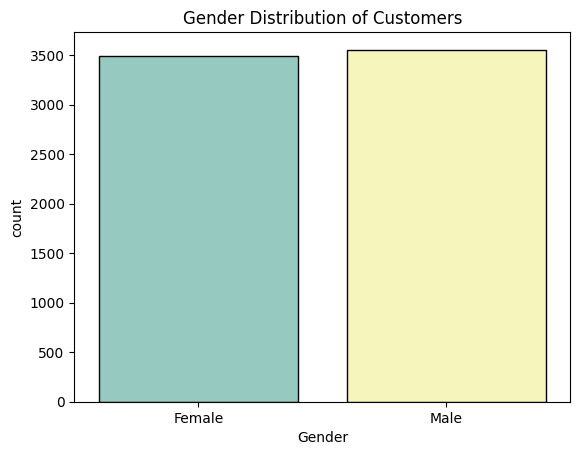

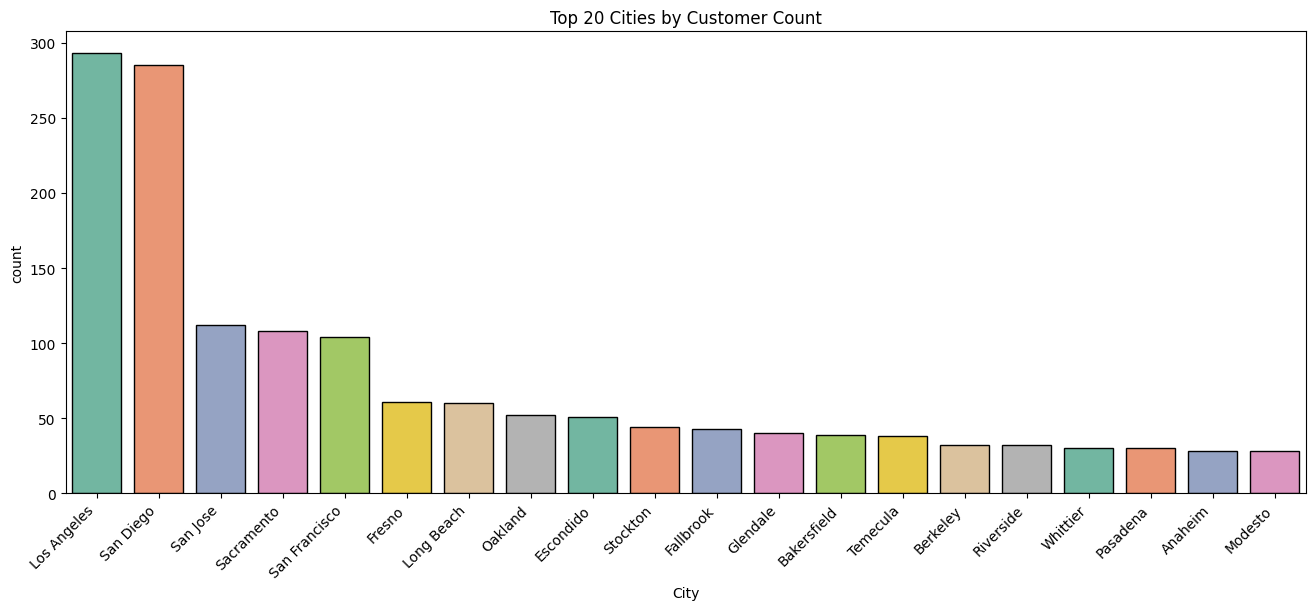

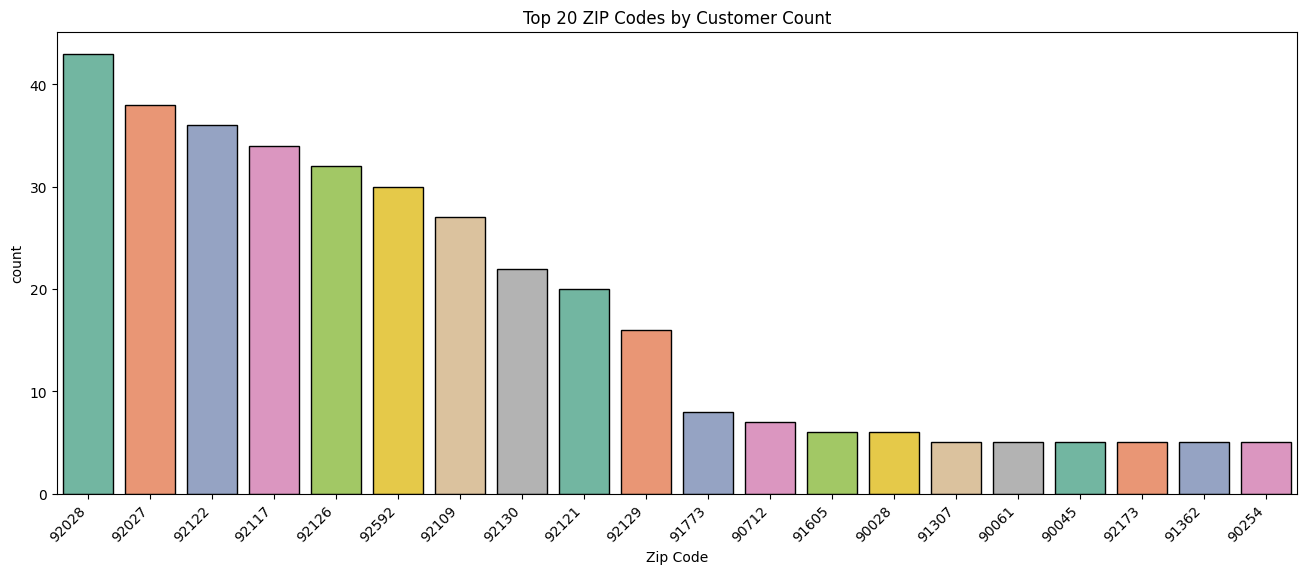

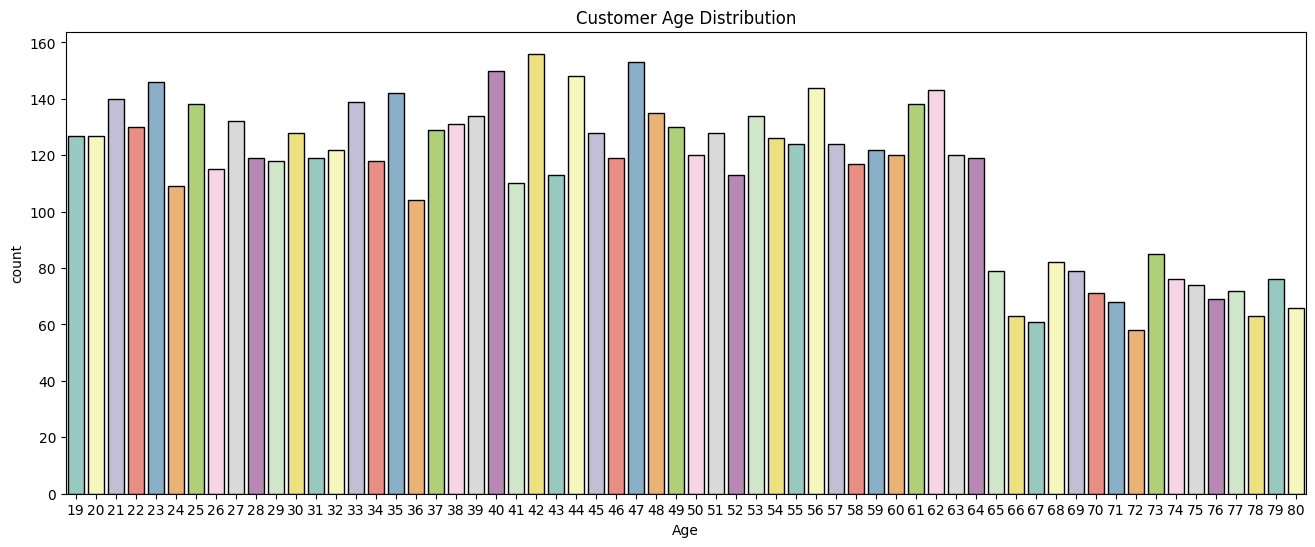

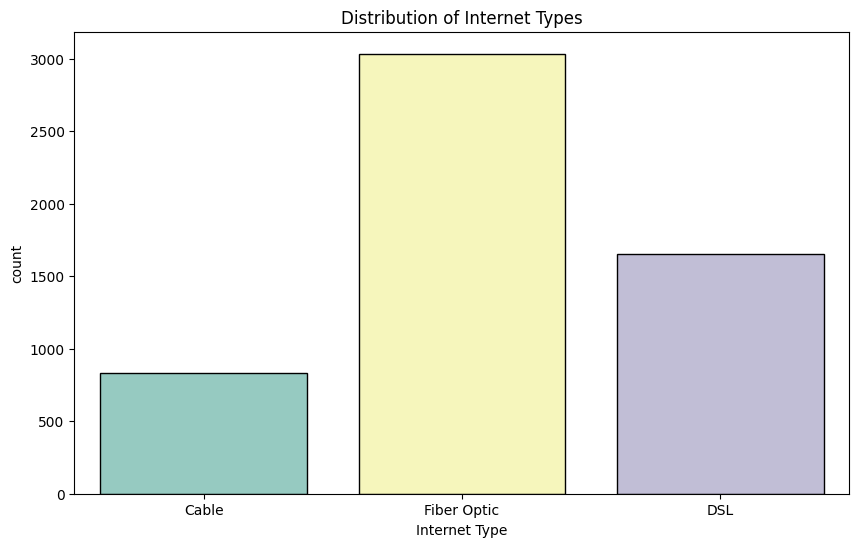

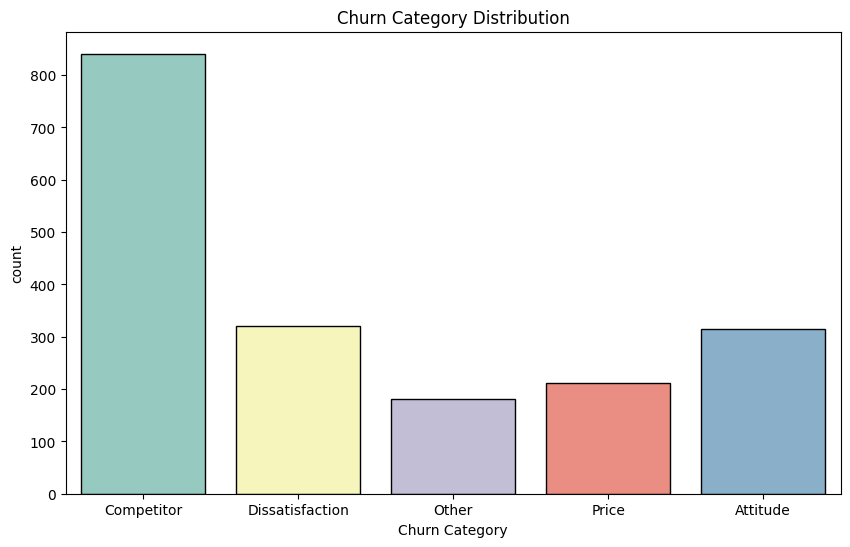

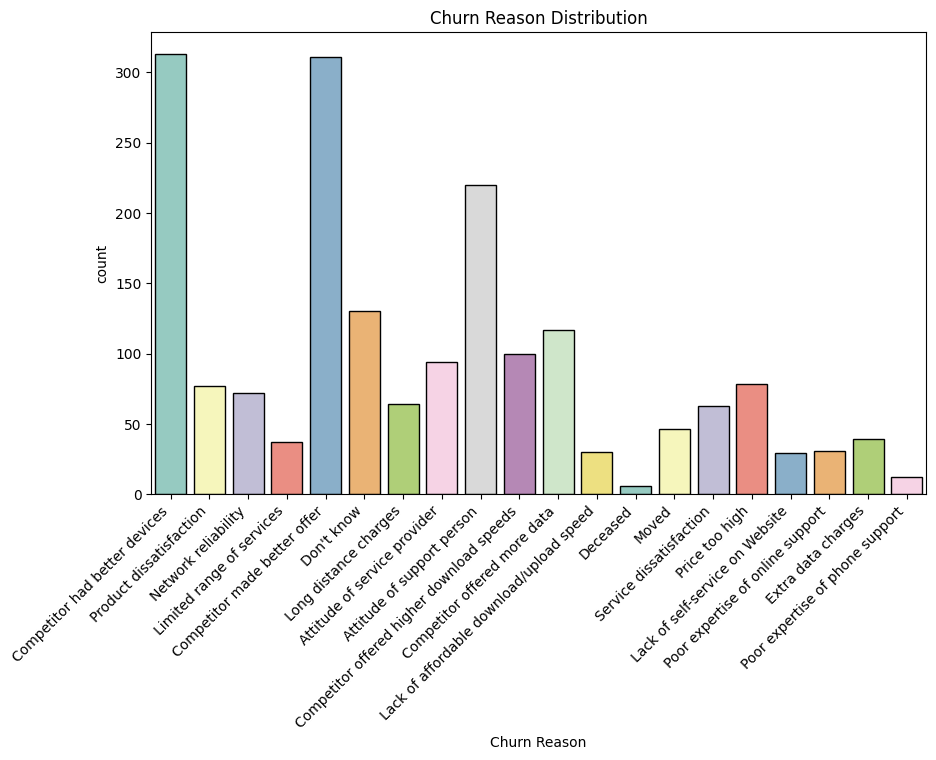

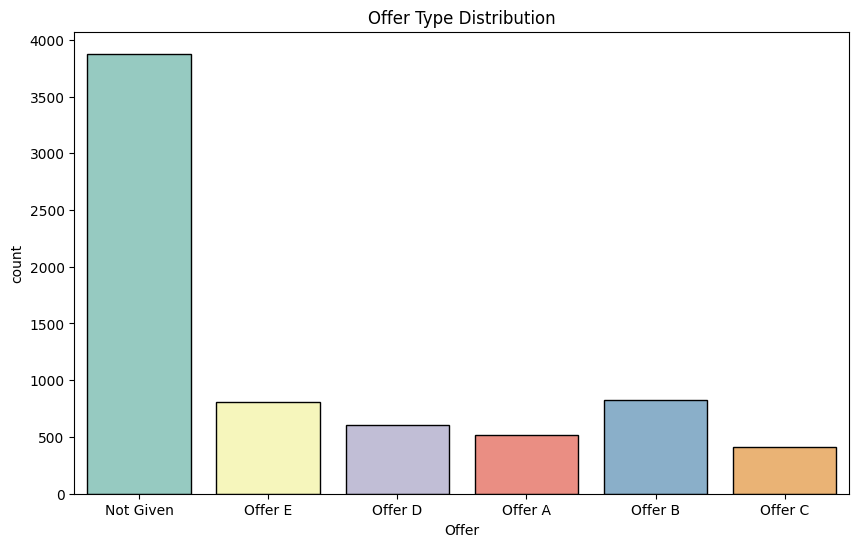

In [51]:
# --------------------------------------------
# 📊 Exploratory Data Analysis (EDA): Demographics & Churn Insights
# --------------------------------------------

# Importing additional libraries
# seaborn → for advanced and aesthetically pleasing visualizations
# warnings → to suppress unnecessary warnings for cleaner output
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --------------------------------------------
# 🧹 Data Cleaning: Handling Missing Values
# --------------------------------------------

# Filling missing values with 'Not Given' for categorical columns
# This helps prevent errors during visualization and analysis
df['Internet Type'] = df['Internet Type'].fillna('Not Given')
df['Churn Category'] = df['Churn Category'].fillna('Not Given')
df['Churn Reason'] = df['Churn Reason'].fillna('Not Given')
df['Offer'] = df['Offer'].fillna('Not Given')

# --------------------------------------------
# 👩‍💼 Gender Distribution
# --------------------------------------------
sns.countplot(x=df['Gender'], edgecolor='black', palette="Set3")
plt.title('Gender Distribution of Customers')
plt.show()

# --------------------------------------------
# 🏙️ Top 20 Cities by Customer Count
# --------------------------------------------
plt.figure(figsize=(16, 6))
top_20_cities = df['City'].value_counts().nlargest(20).index
sns.countplot(x=df['City'], order=top_20_cities, edgecolor='black', palette="Set2")
plt.title('Top 20 Cities by Customer Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# --------------------------------------------
# 🏠 Top 20 ZIP Codes by Customer Count
# --------------------------------------------
plt.figure(figsize=(16, 6))
top_20_zip_codes = df['Zip Code'].value_counts().nlargest(20).index
sns.countplot(x=df['Zip Code'], order=top_20_zip_codes, edgecolor='black', palette="Set2")
plt.title('Top 20 ZIP Codes by Customer Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# --------------------------------------------
# 🎂 Age Distribution of Customers
# --------------------------------------------
plt.figure(figsize=(16, 6))
sns.countplot(x=df['Age'], edgecolor='black', palette="Set3")
plt.title('Customer Age Distribution')
plt.show()

# --------------------------------------------
# 🌐 Internet Type Distribution (Excluding Missing Data)
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(x=df[df['Internet Type'] != 'Not Given']['Internet Type'],
              edgecolor='black', palette="Set3")
plt.title('Distribution of Internet Types')
plt.show()

# --------------------------------------------
# 🔁 Churn Category Distribution (Excluding Missing Data)
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(x=df[df['Churn Category'] != 'Not Given']['Churn Category'],
              edgecolor='black', palette="Set3")
plt.title('Churn Category Distribution')
plt.show()

# --------------------------------------------
# ❌ Churn Reason Distribution (Excluding Missing Data)
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(x=df[df['Churn Reason'] != 'Not Given']['Churn Reason'],
              edgecolor='black', palette="Set3")
plt.title('Churn Reason Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

# --------------------------------------------
# 🎁 Offer Type Distribution
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Offer'], edgecolor='black', palette="Set3")
plt.title('Offer Type Distribution')
plt.show()

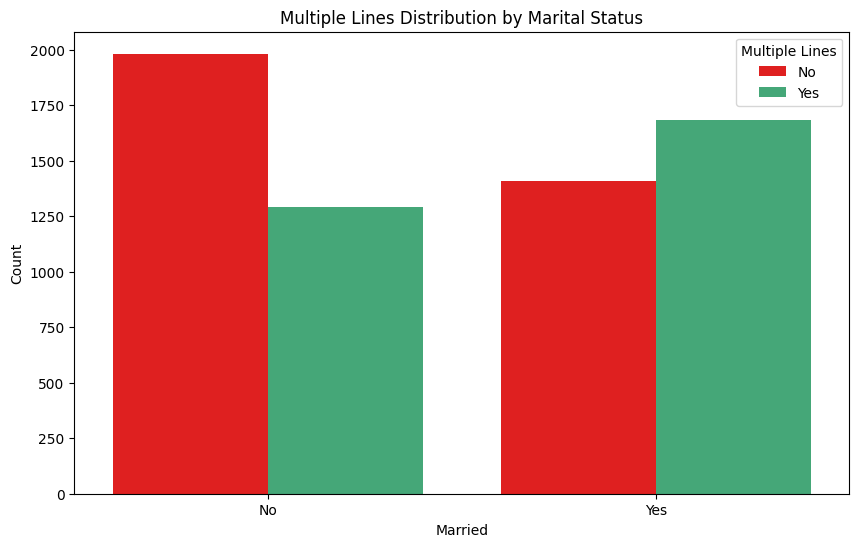

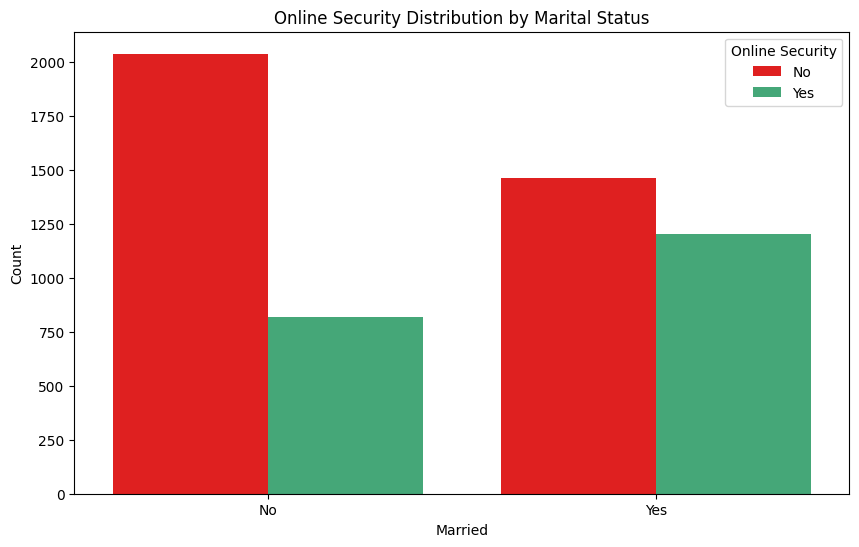

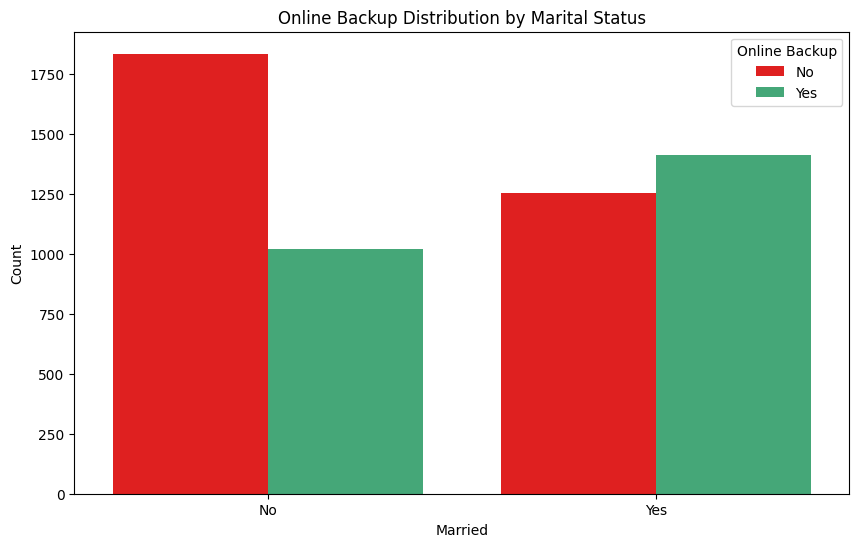

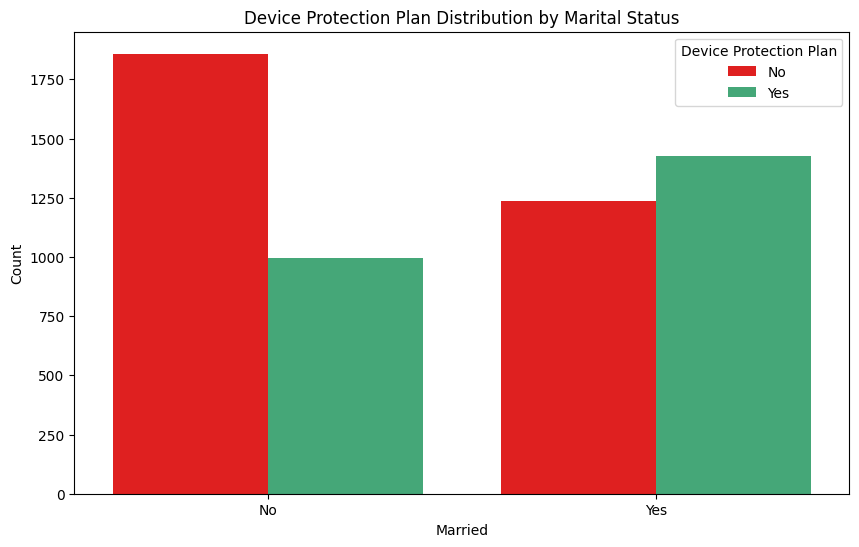

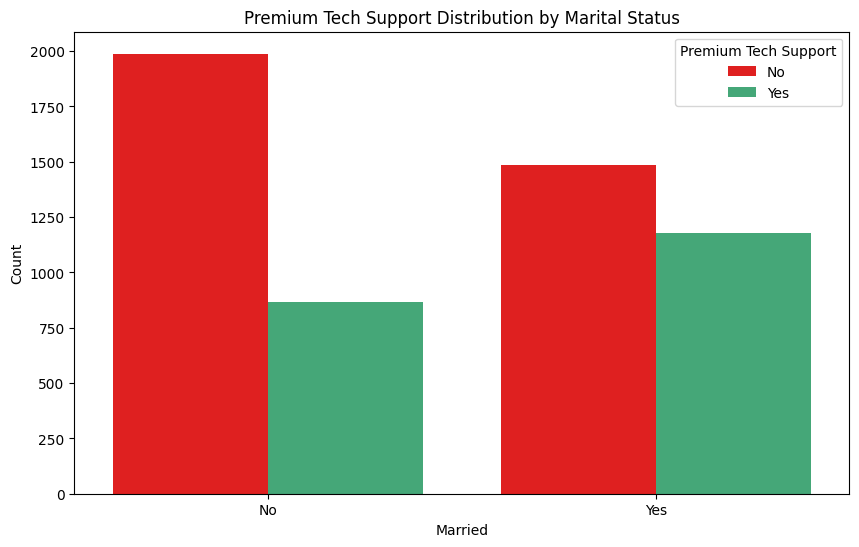

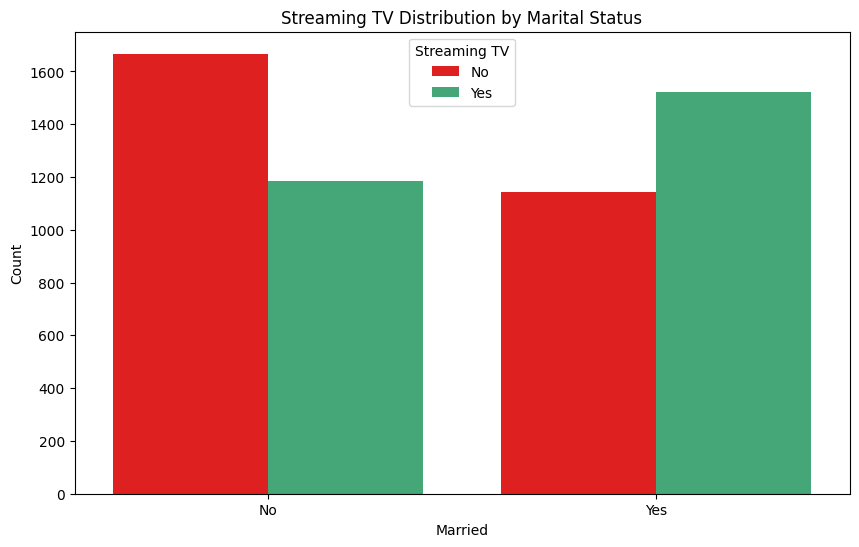

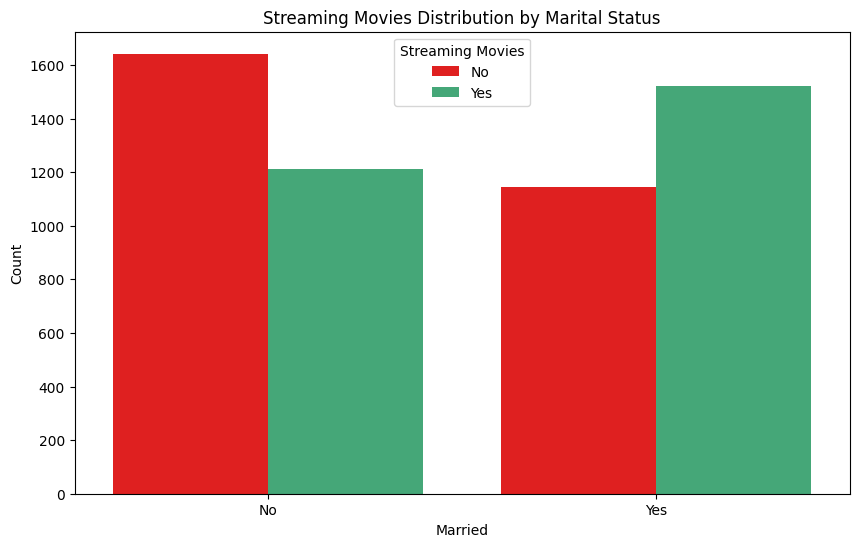

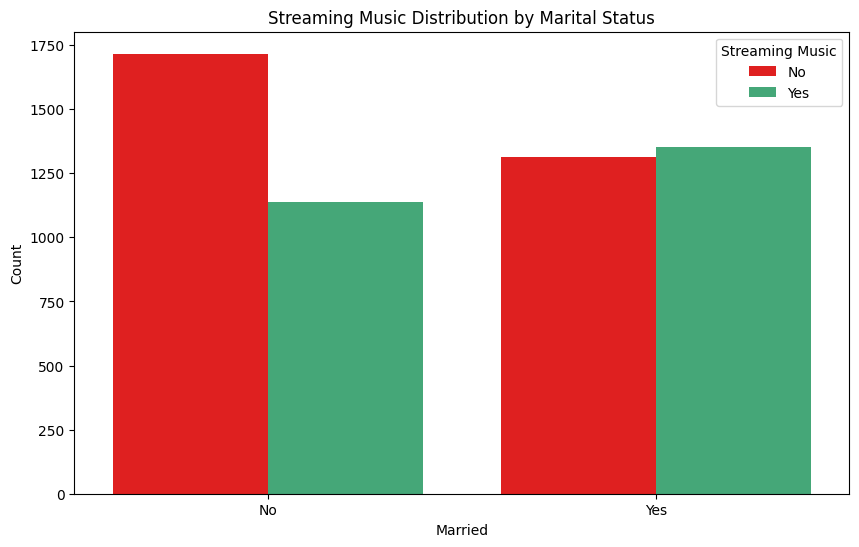

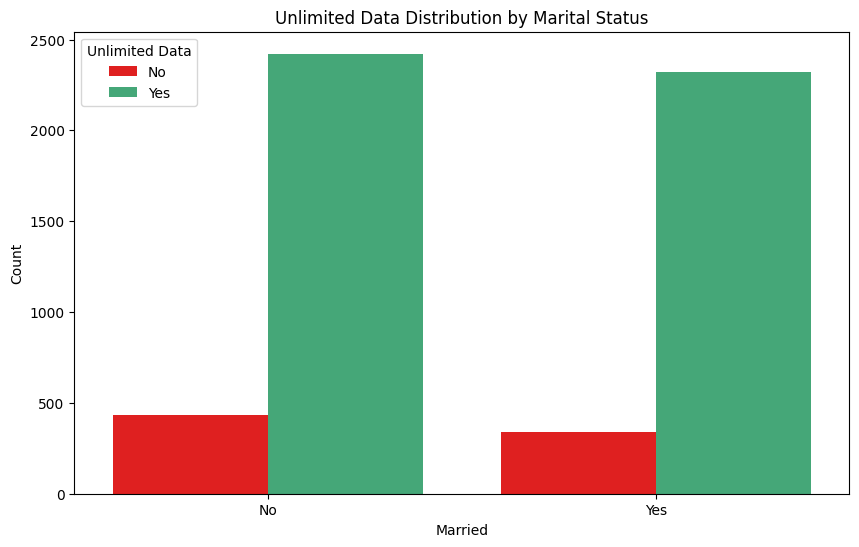

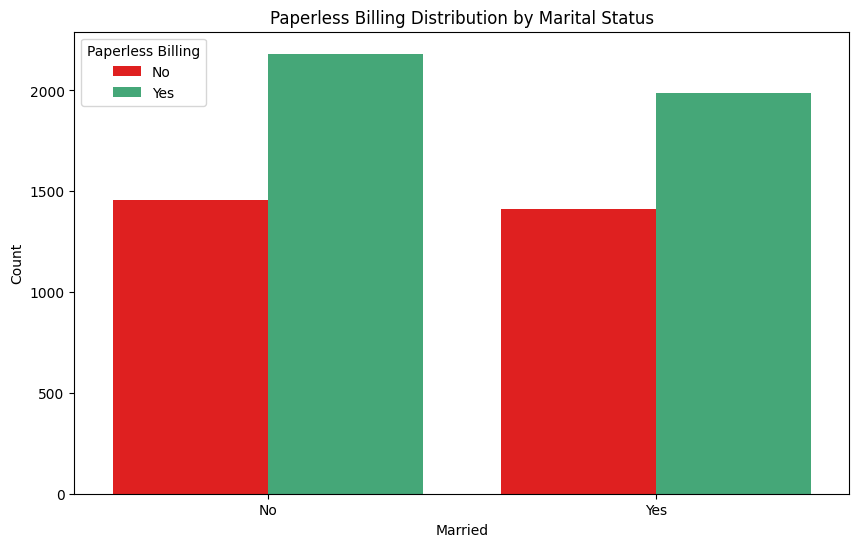

In [52]:
# --------------------------------------------
# Visualization: Service Subscription by Marital Status
# --------------------------------------------

# Defining a list of telecom services to visualize
# Each represents a feature indicating whether the customer has the service
service_cols_to_plot = [
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Paperless Billing'
]

# Looping through each service column to create comparative bar plots
for col in service_cols_to_plot:
    # Check if the column exists in the dataset
    if col in df.columns:
        # Group data by marital status and the current service column
        # Then calculate counts for each combination
        counts = df.groupby(['Married', col]).size().reset_index(name='Count')

        # Set the figure size for better readability
        plt.figure(figsize=(10, 6))

        # Define a custom color palette:
        # Highlight 'No' categories in red for easier interpretation
        custom_palette = {
            category: 'red' if 'No' in str(category) else color
            for category, color in zip(
                counts[col].unique(),
                sns.color_palette('viridis', n_colors=len(counts[col].unique()))
            )
        }

        # Create a bar plot comparing service adoption by marital status
        sns.barplot(x='Married', y='Count', hue=col, data=counts, palette=custom_palette)

        # Add a dynamic title for each service feature
        plt.title(f'{col} Distribution by Marital Status')

        # Display the plot
        plt.show()
    else:
        # Inform the user if the expected column is missing
        print(f"Column '{col}' not found in the DataFrame.")

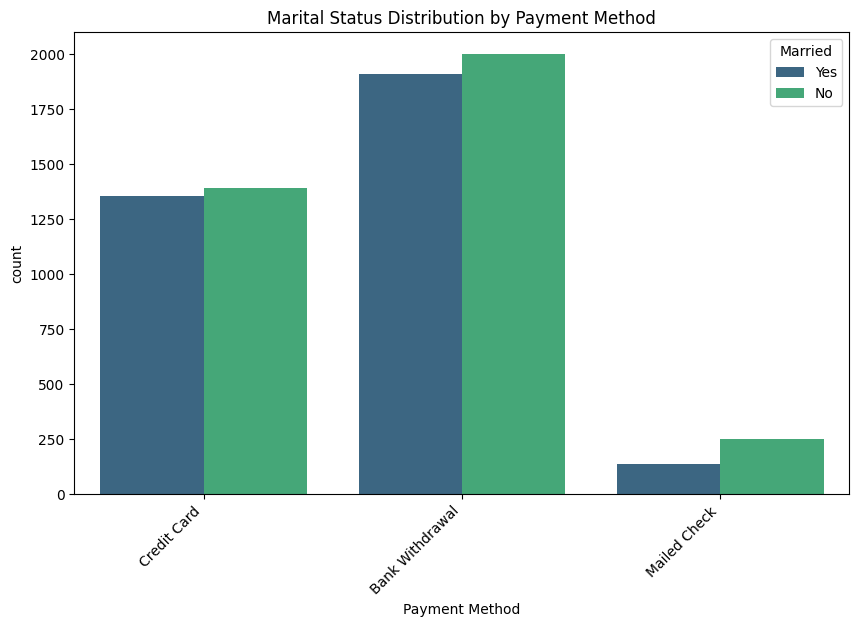

In [53]:
# Importing seaborn for advanced data visualization
import seaborn as sns

# Setting the figure size for better readability of the plot
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize how marital status is distributed
# across different payment methods
# 'x' → categorical variable on the x-axis (Payment Method)
# 'hue' → subgrouping based on marital status (Married)
# 'palette' → defines color theme for the plot
sns.countplot(x='Payment Method', hue='Married', data=df, palette='viridis')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding a title to describe the chart
plt.title('Marital Status Distribution by Payment Method')

# Displaying the final plot
plt.show()

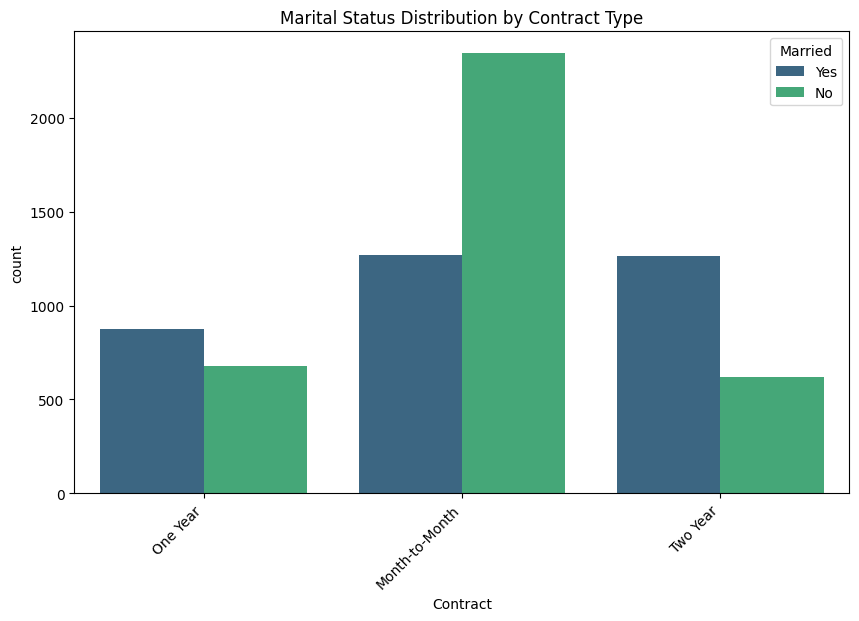

In [54]:
# Setting the figure size for clarity and readability
plt.figure(figsize=(10, 6))

# Creating a count plot to analyze the relationship between contract type and marital status
# 'x' → Contract type (e.g., Month-to-month, One year, Two year)
# 'hue' → Marital status (Married or not)
# 'palette' → defines the color theme for the plot
sns.countplot(x='Contract', hue='Married', data=df, palette='viridis')

# Rotating x-axis labels to prevent overlap and improve visibility
plt.xticks(rotation=45, ha='right')

# Adding a descriptive title to the visualization
plt.title('Marital Status Distribution by Contract Type')

# Displaying the completed plot
plt.show()

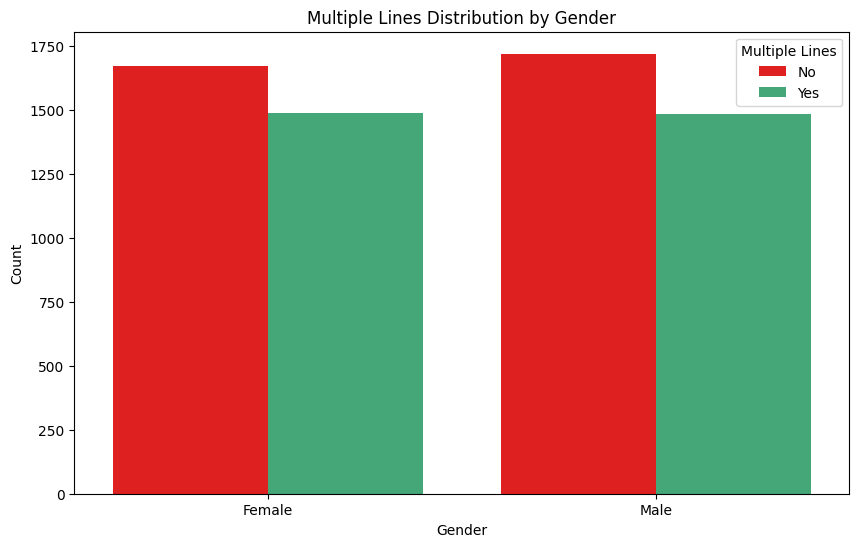

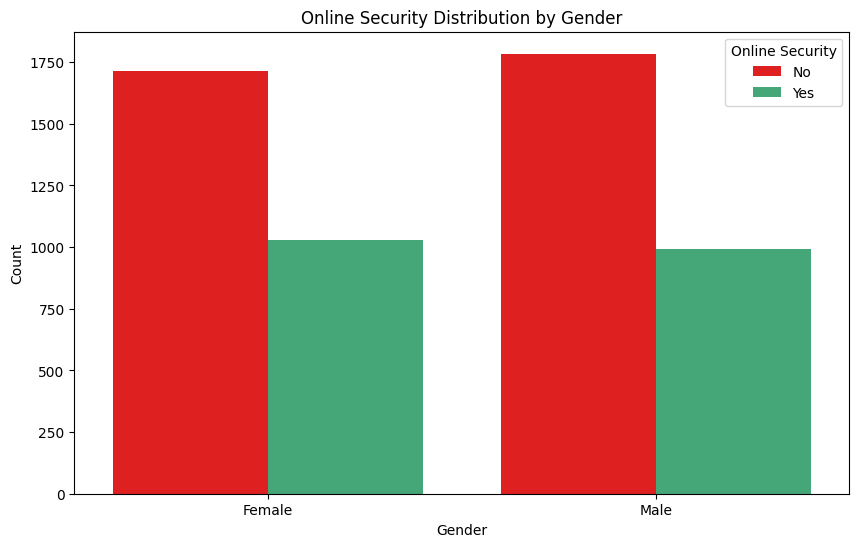

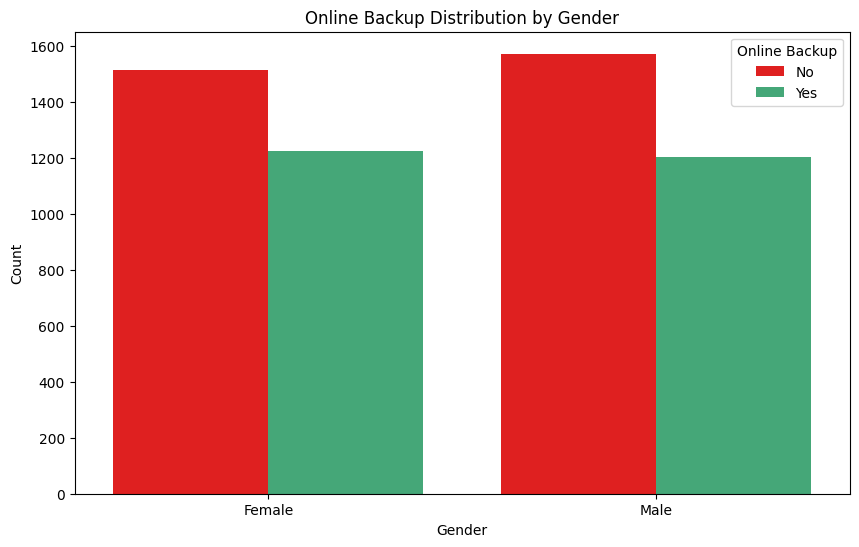

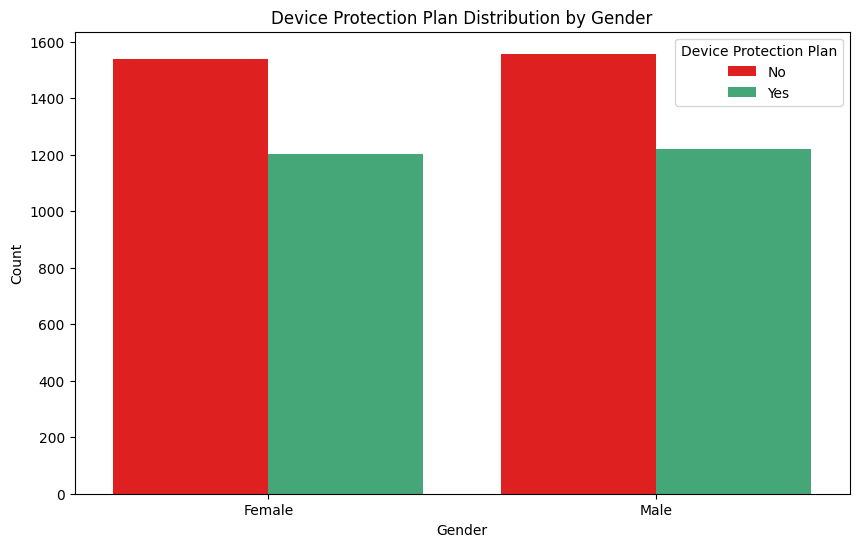

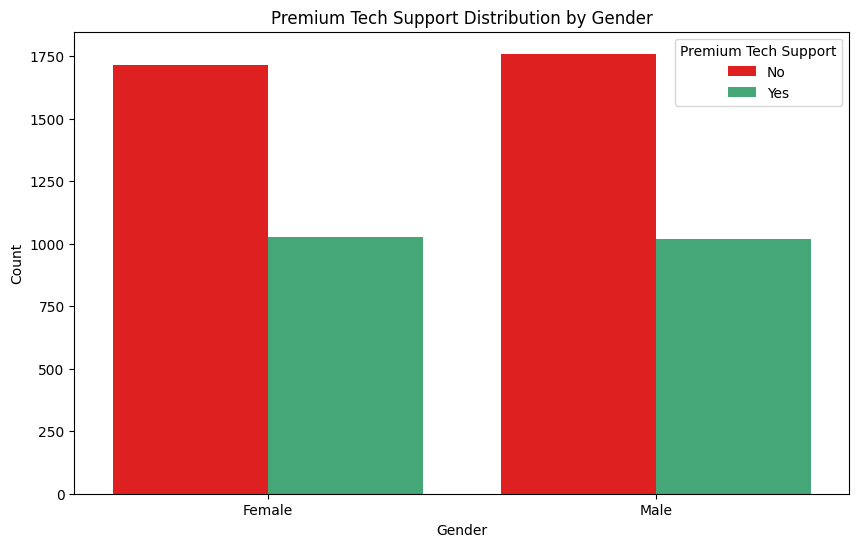

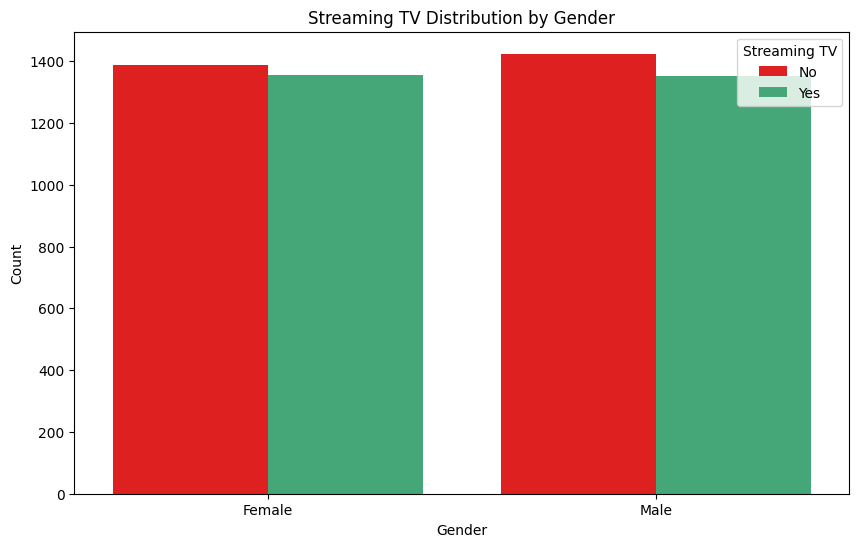

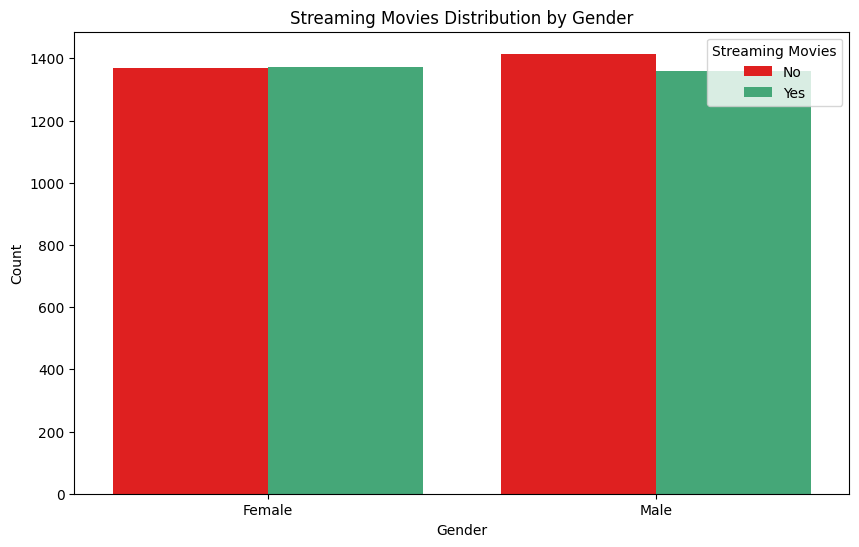

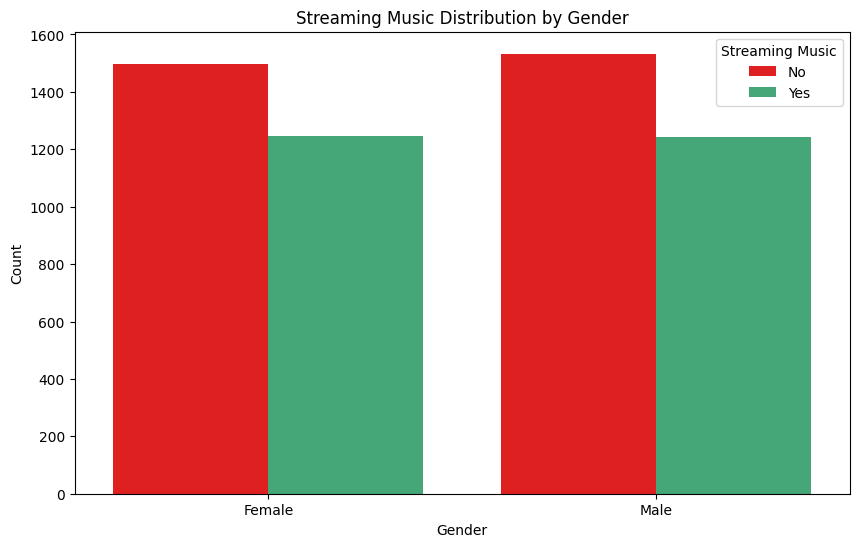

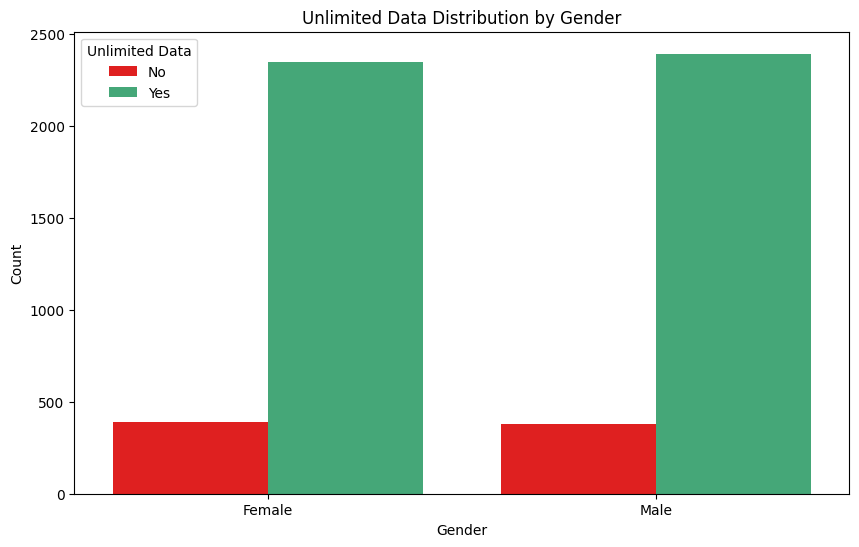

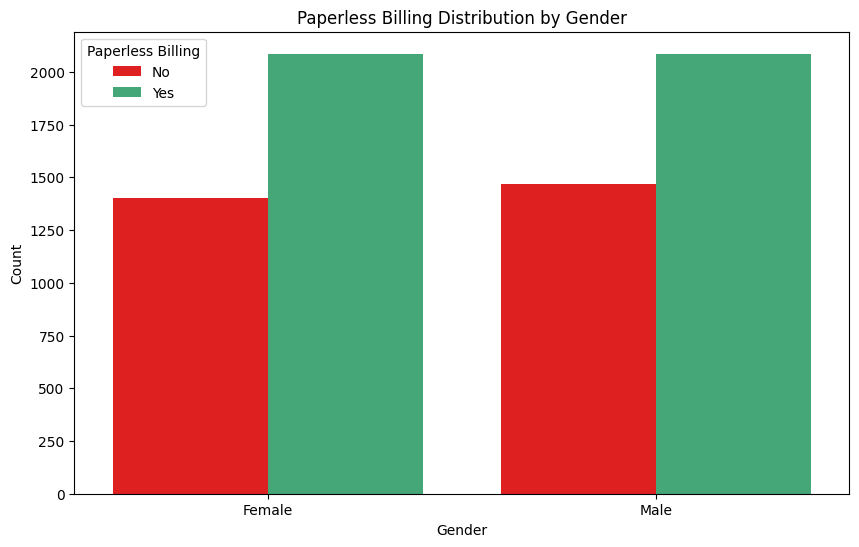

In [55]:
# --------------------------------------------
# 📊 Visualization: Service Subscription by Gender
# --------------------------------------------

# Defining the list of service-related columns to analyze
service_cols_to_plot = [
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Paperless Billing'
]

# Loop through each service column to visualize gender-based distributions
for col in service_cols_to_plot:
    # Verify that the column exists in the dataset
    if col in df.columns:
        # Group data by gender and the current service column, and count occurrences
        counts = df.groupby(['Gender', col]).size().reset_index(name='Count')

        # Set the figure size for improved readability
        plt.figure(figsize=(10, 6))

        # Create a custom color palette:
        # Highlight 'No' responses in red for visual emphasis
        custom_palette = {
            category: 'red' if 'No' in str(category) else color
            for category, color in zip(
                counts[col].unique(),
                sns.color_palette('viridis', n_colors=len(counts[col].unique()))
            )
        }

        # Generate a bar plot comparing service subscription counts by gender
        sns.barplot(x='Gender', y='Count', hue=col, data=counts, palette=custom_palette)

        # Add a dynamic and descriptive title for each service feature
        plt.title(f'{col} Distribution by Gender')

        # Display the plot
        plt.show()

    else:
        # Print a message if a column is missing from the dataset
        print(f"Column '{col}' not found in the DataFrame.")

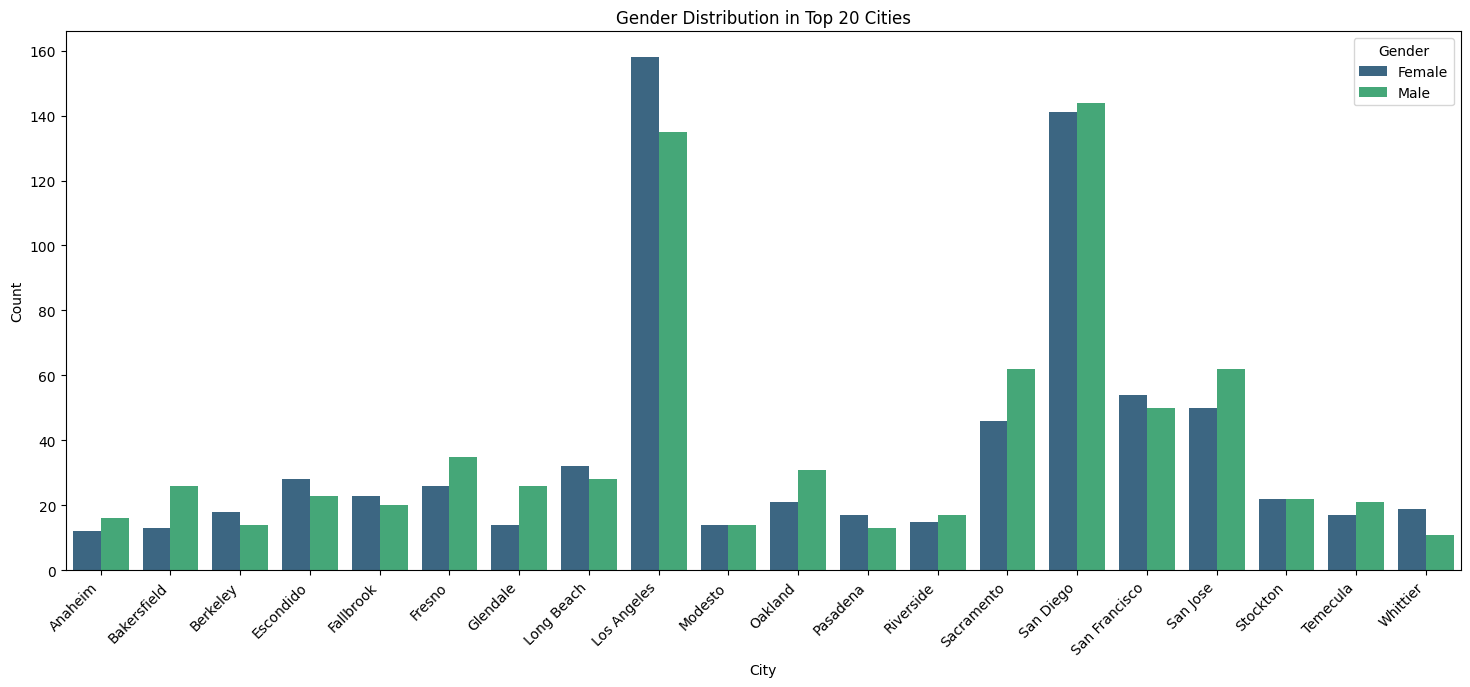

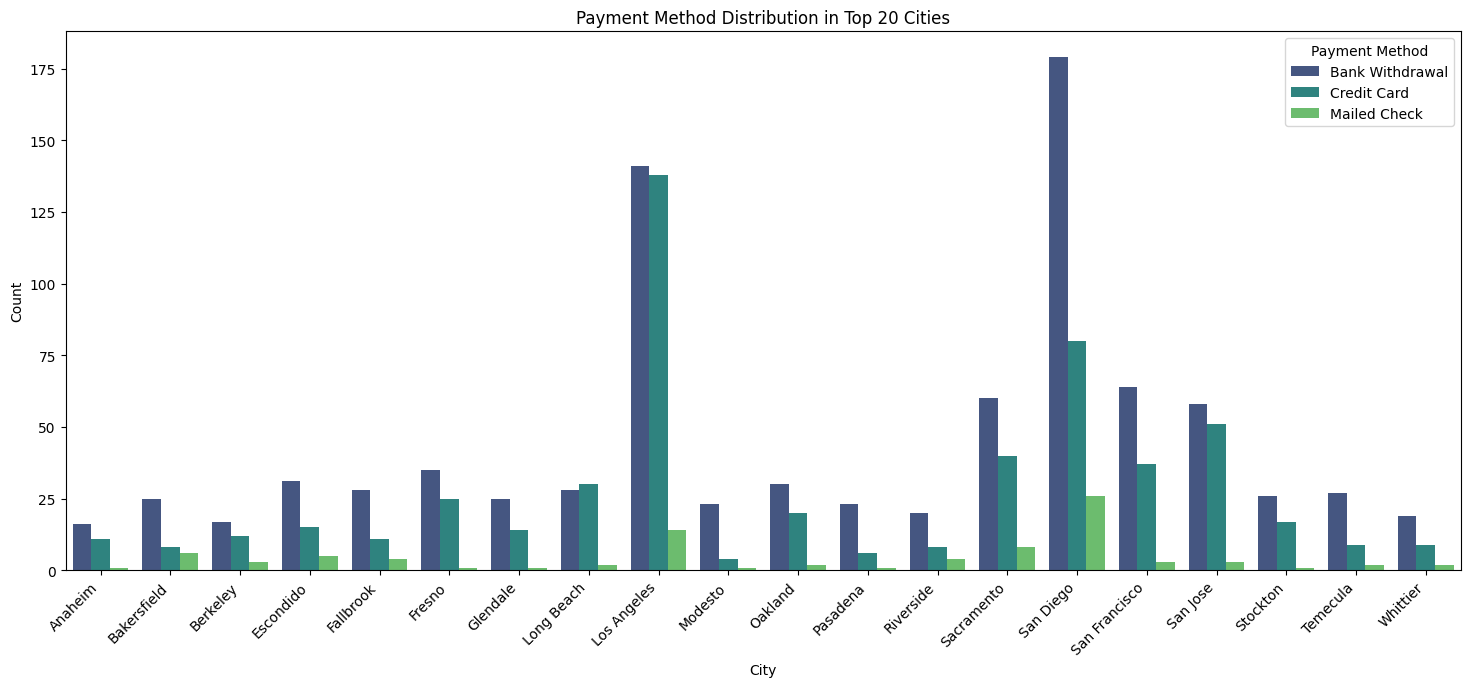

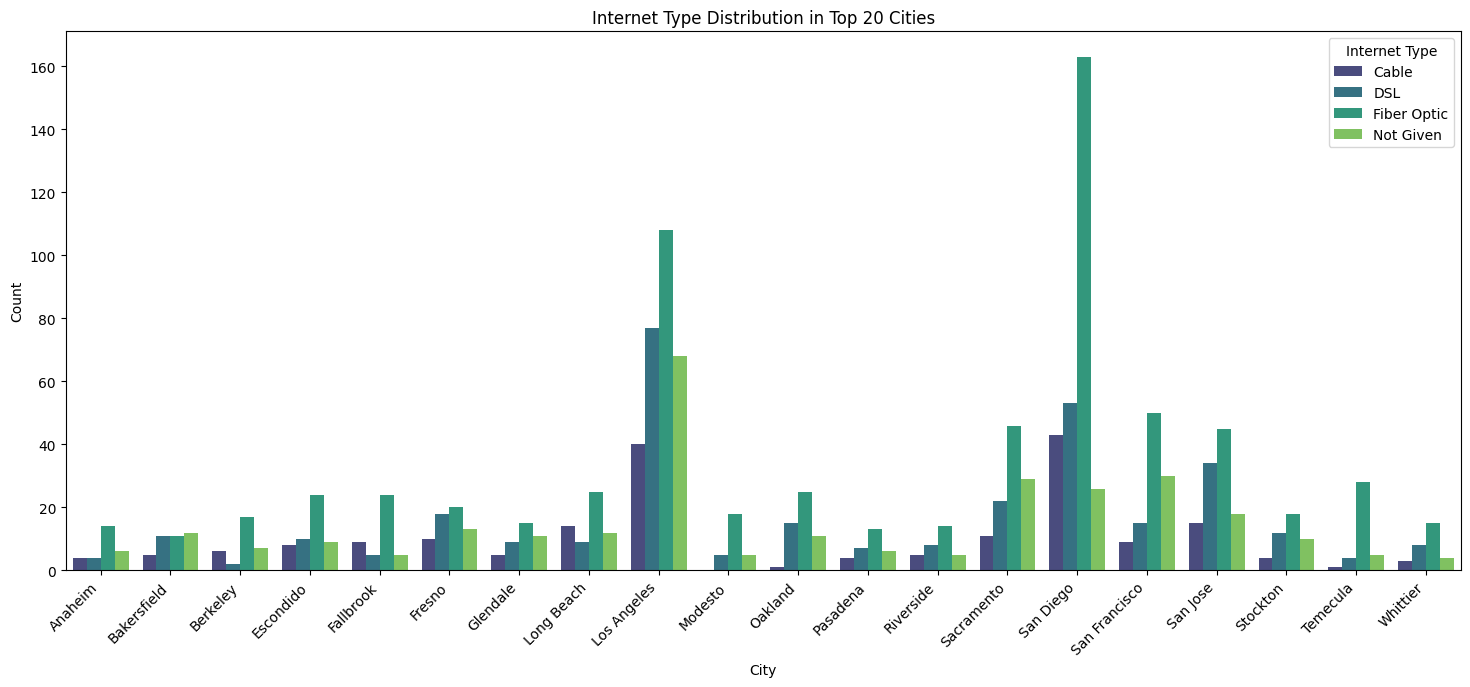

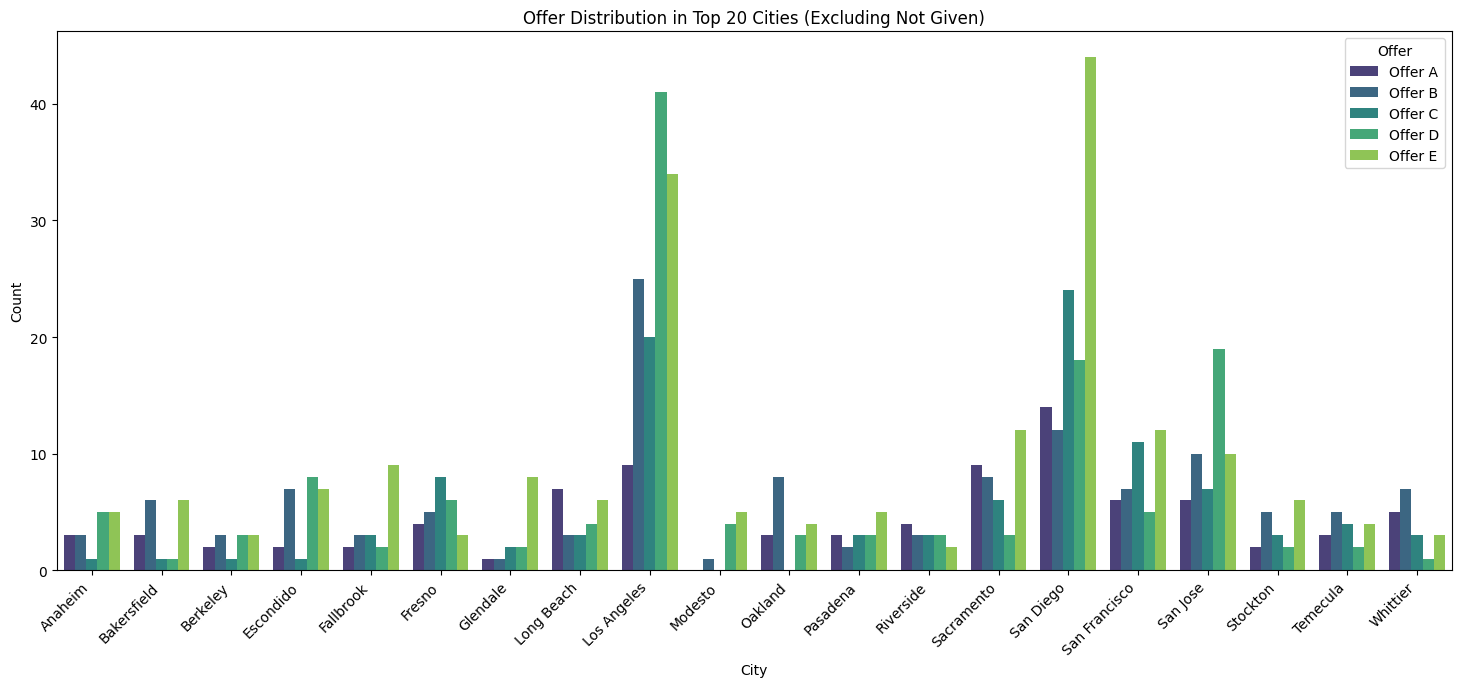

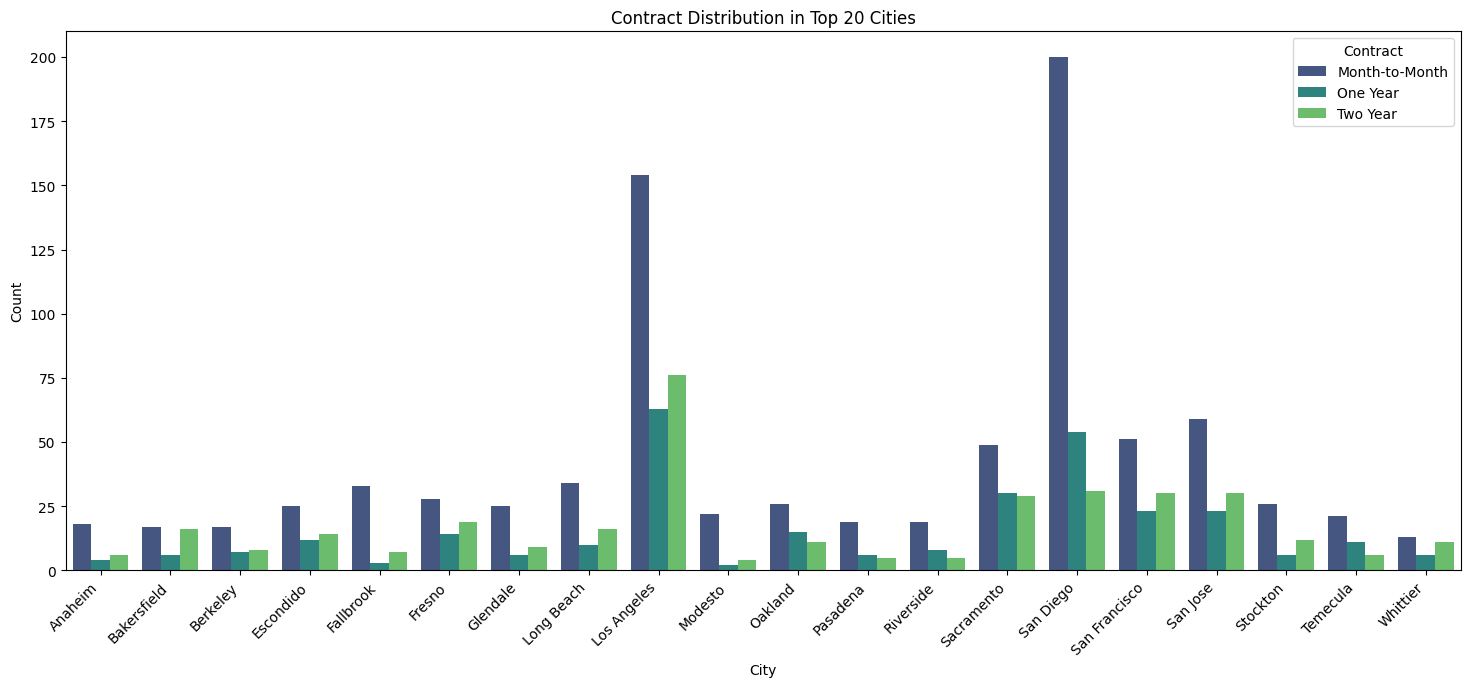

In [56]:
# --------------------------------------------
# 🏙️ City-Level Analysis: Top 20 Cities by Customer Count
# --------------------------------------------

# Identify the top 20 cities with the highest number of customers
top_20_cities = df['City'].value_counts().nlargest(20).index

# Filter the dataset to include only those top 20 cities
df_top_cities = df[df['City'].isin(top_20_cities)]

# --------------------------------------------
# 👩‍🦰 Gender Distribution in Top 20 Cities
# --------------------------------------------

# Group data by City and Gender, then count the number of customers in each group
gender_counts = df_top_cities.groupby(['City', 'Gender']).size().reset_index(name='Count')

# Visualize gender distribution across the top cities
plt.figure(figsize=(18, 7))
sns.barplot(x='City', y='Count', hue='Gender', data=gender_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Gender Distribution in Top 20 Cities')
plt.show()

# --------------------------------------------
# 💳 Payment Method Distribution in Top 20 Cities
# --------------------------------------------

# Group data by City and Payment Method to count the number of customers per category
payment_method_counts = df_top_cities.groupby(['City', 'Payment Method']).size().reset_index(name='Count')

# Visualize the distribution of payment methods across top cities
plt.figure(figsize=(18, 7))
sns.barplot(x='City', y='Count', hue='Payment Method', data=payment_method_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Payment Method Distribution in Top 20 Cities')
plt.show()

# --------------------------------------------
# 🌐 Internet Type Distribution in Top 20 Cities
# --------------------------------------------

# Group data by City and Internet Type, then count occurrences
internet_type_counts = df_top_cities.groupby(['City', 'Internet Type']).size().reset_index(name='Count')

# Visualize how internet types are distributed across major cities
plt.figure(figsize=(18, 7))
sns.barplot(x='City', y='Count', hue='Internet Type', data=internet_type_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Internet Type Distribution in Top 20 Cities')
plt.show()

# --------------------------------------------
# 🎁 Offer Distribution in Top 20 Cities (Excluding Missing Data)
# --------------------------------------------

# Group data by City and Offer type
offer_counts = df_top_cities.groupby(['City', 'Offer']).size().reset_index(name='Count')

# Exclude 'Not Given' offers for cleaner visualization
offer_counts_filtered = offer_counts[offer_counts['Offer'] != 'Not Given']

# Visualize offer distribution across top cities
plt.figure(figsize=(18, 7))
sns.barplot(x='City', y='Count', hue='Offer', data=offer_counts_filtered, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Offer Distribution in Top 20 Cities (Excluding Not Given)')
plt.show()

# --------------------------------------------
# 📜 Contract Type Distribution in Top 20 Cities
# --------------------------------------------

# Group data by City and Contract type to count customers per category
contract_counts = df_top_cities.groupby(['City', 'Contract']).size().reset_index(name='Count')

# Visualize contract type distribution across major cities
plt.figure(figsize=(18, 7))
sns.barplot(x='City', y='Count', hue='Contract', data=contract_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Contract Distribution in Top 20 Cities')
plt.show()

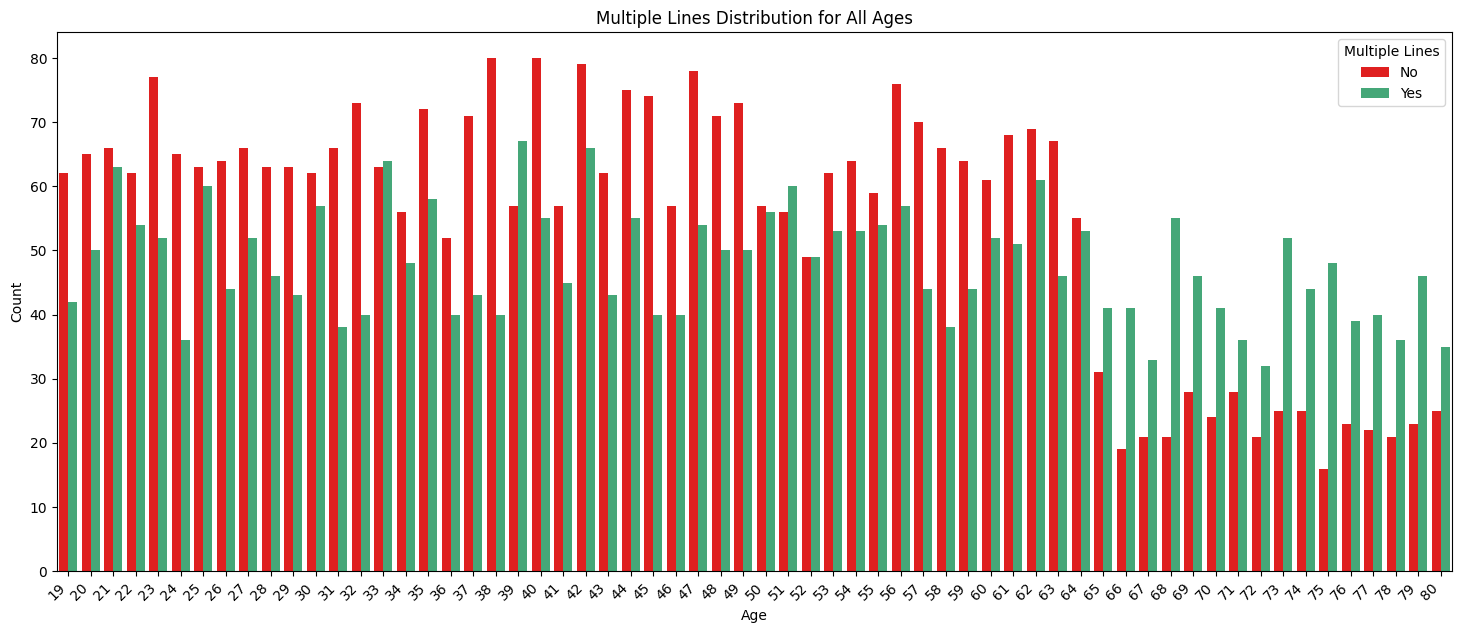

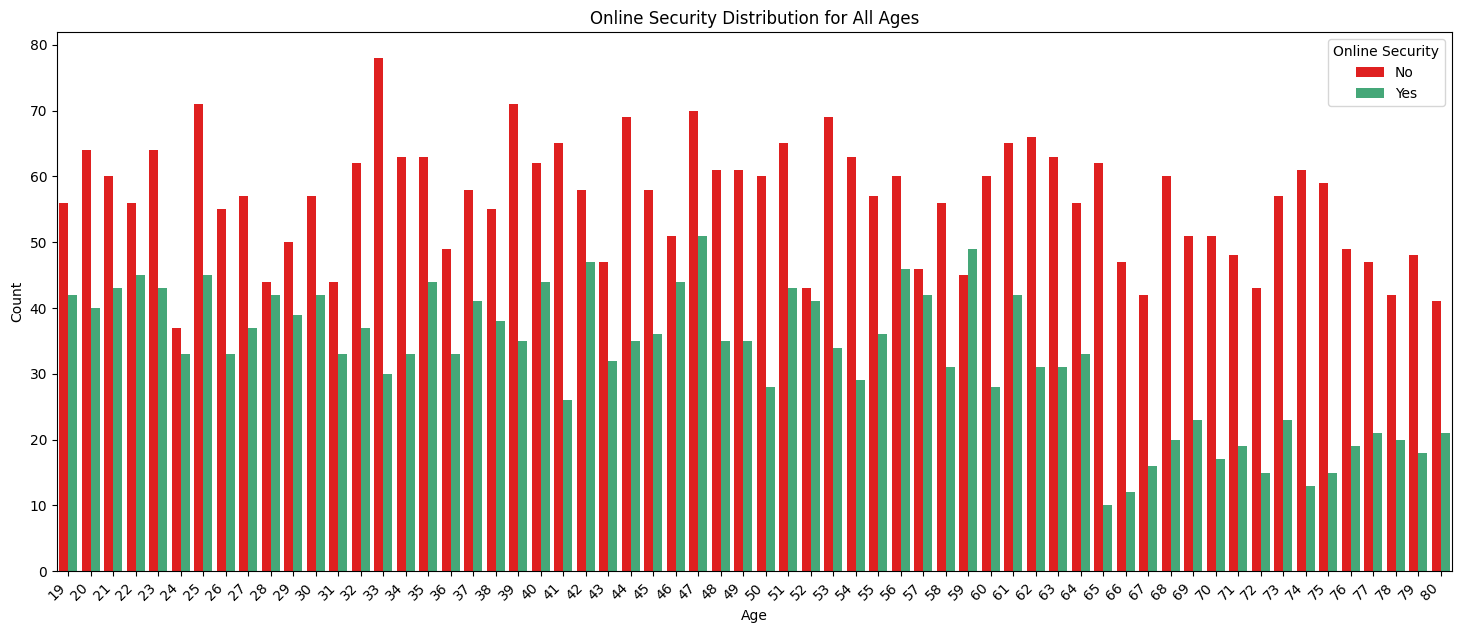

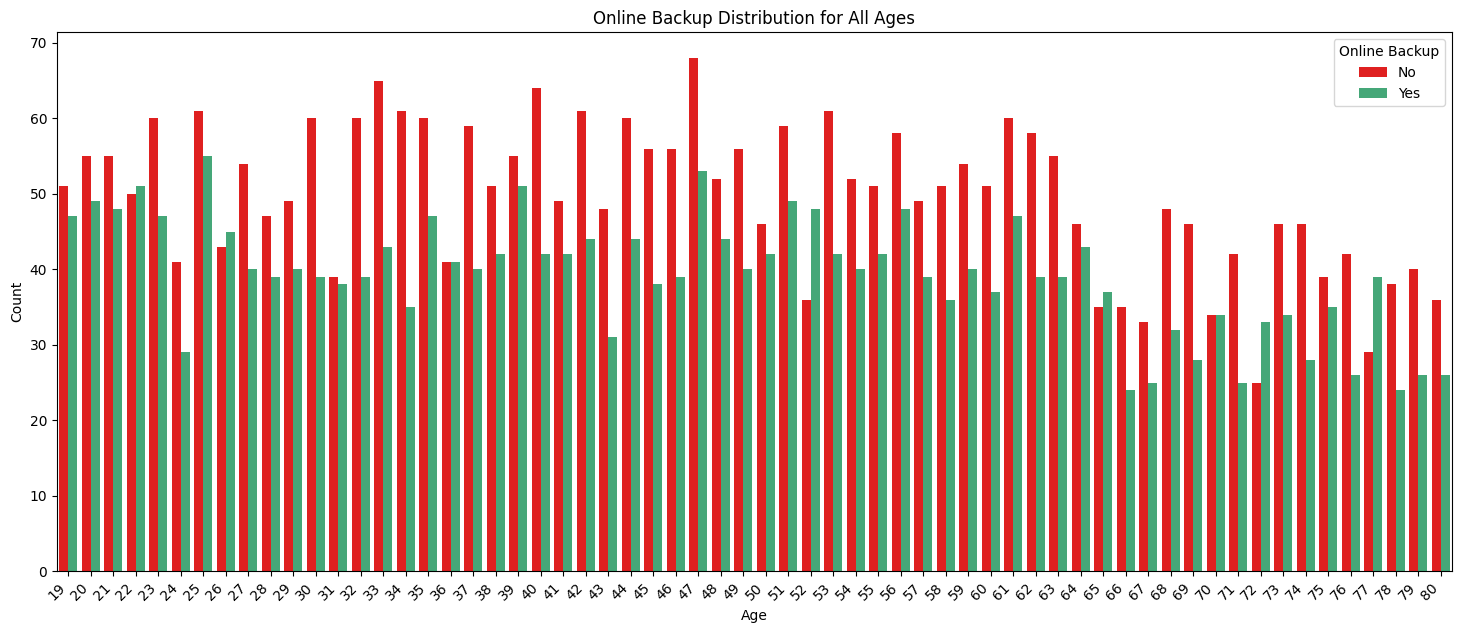

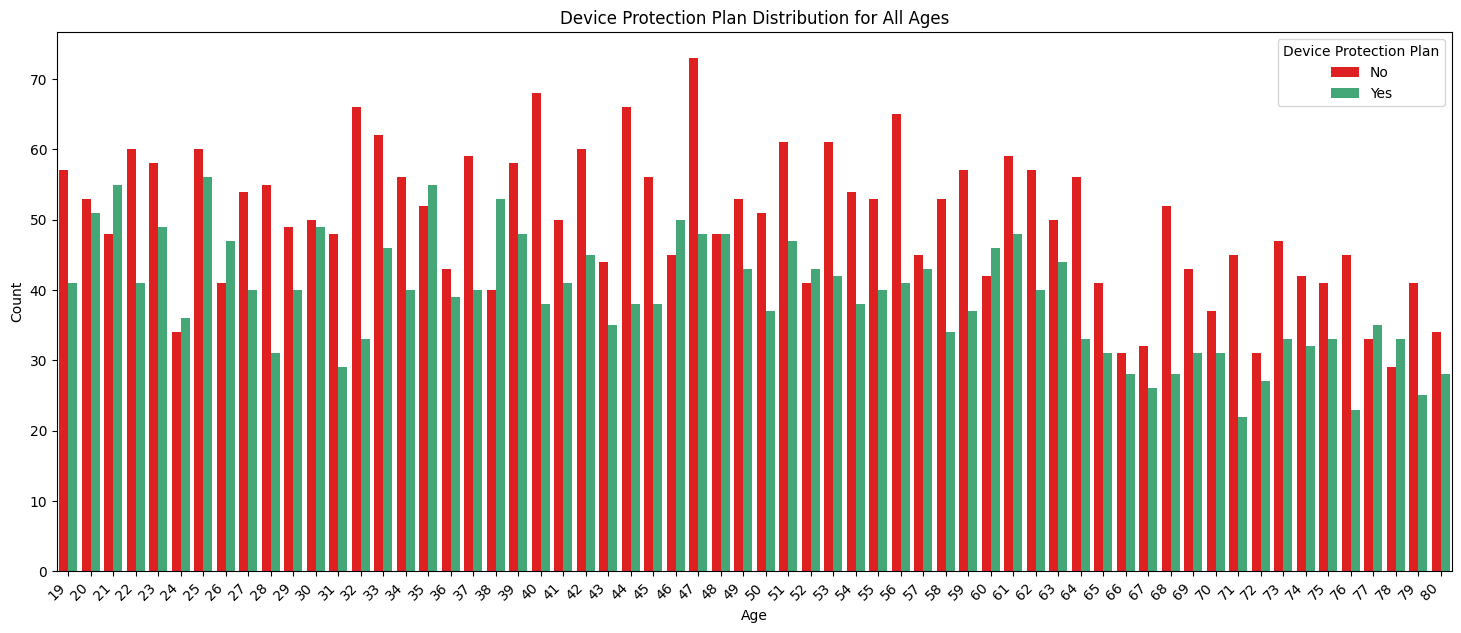

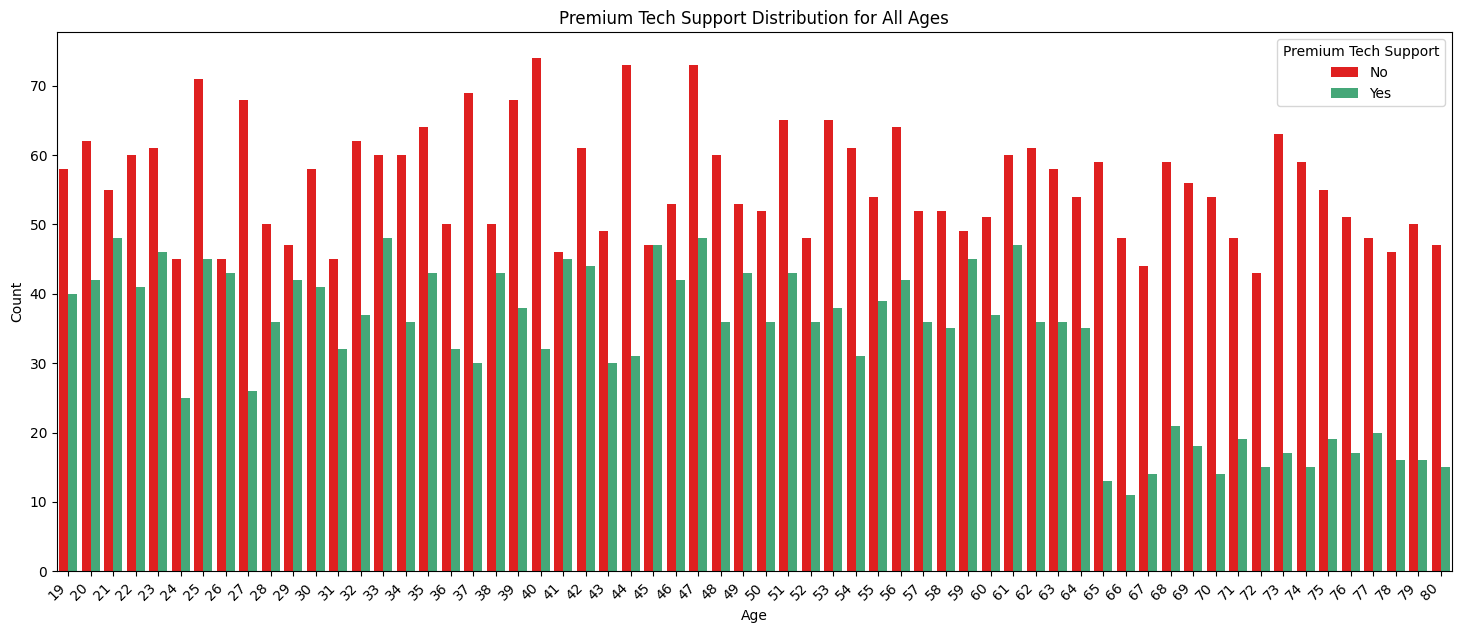

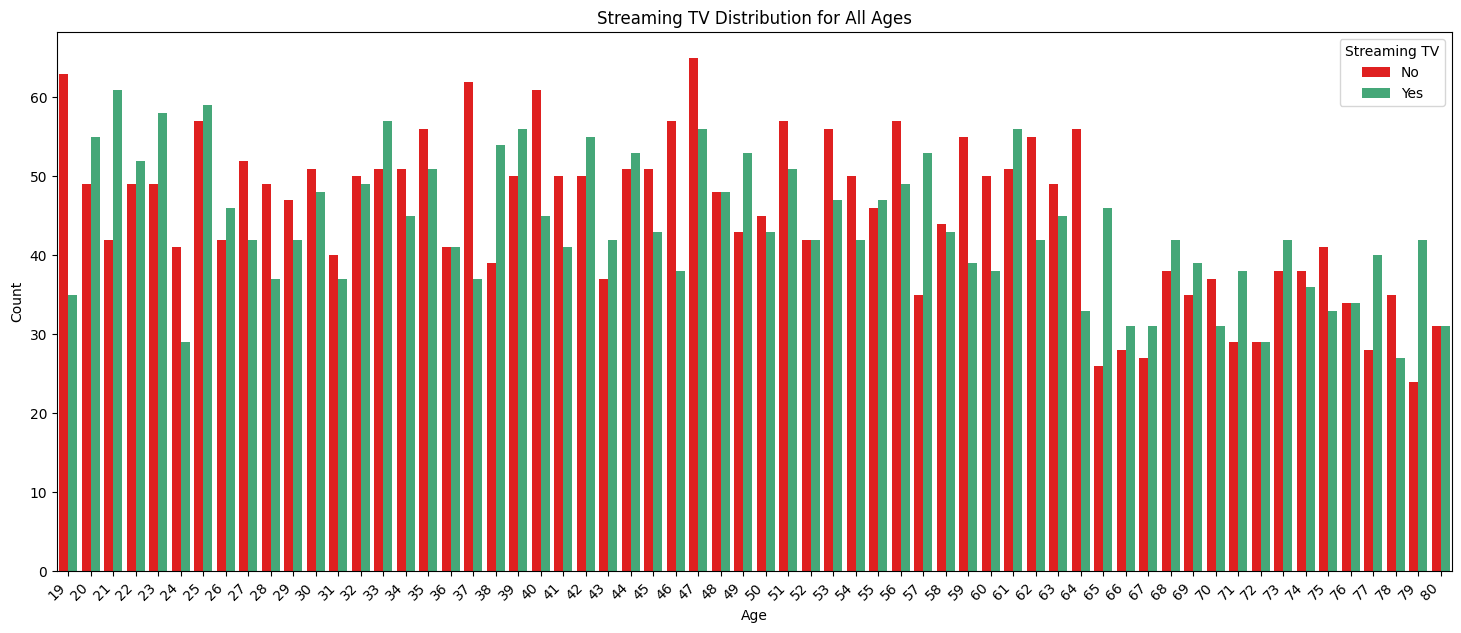

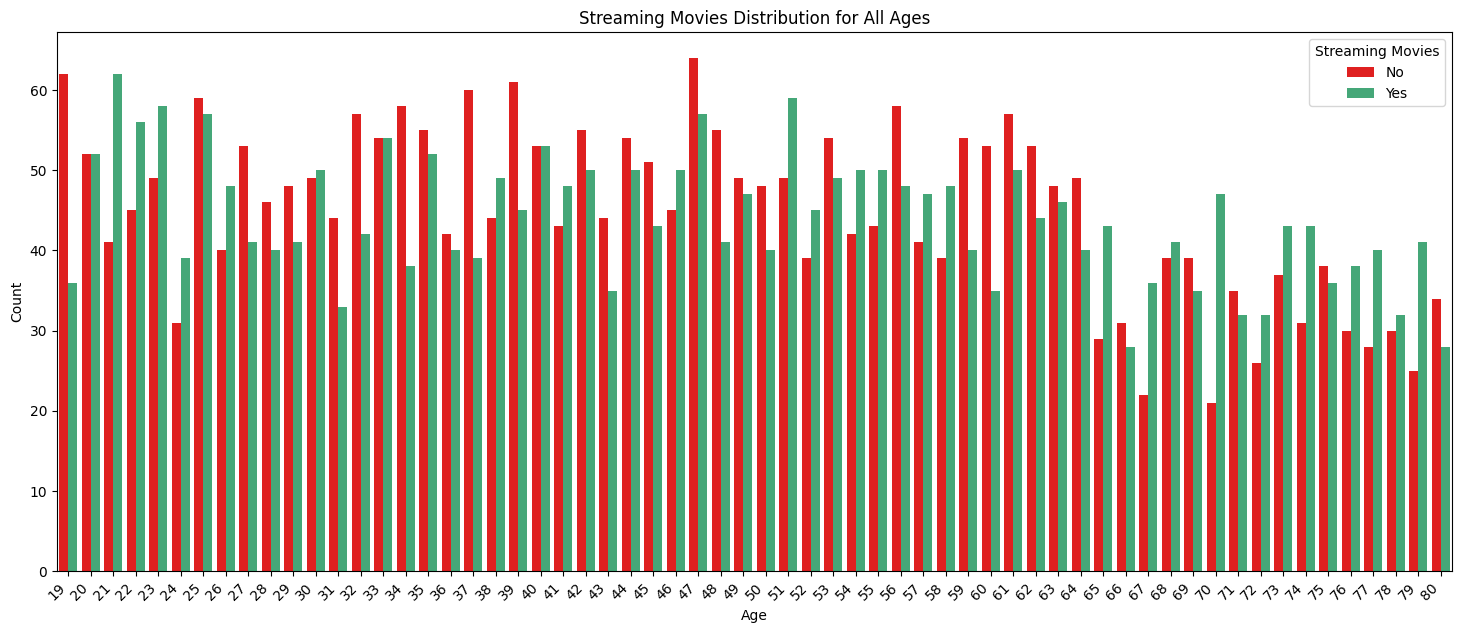

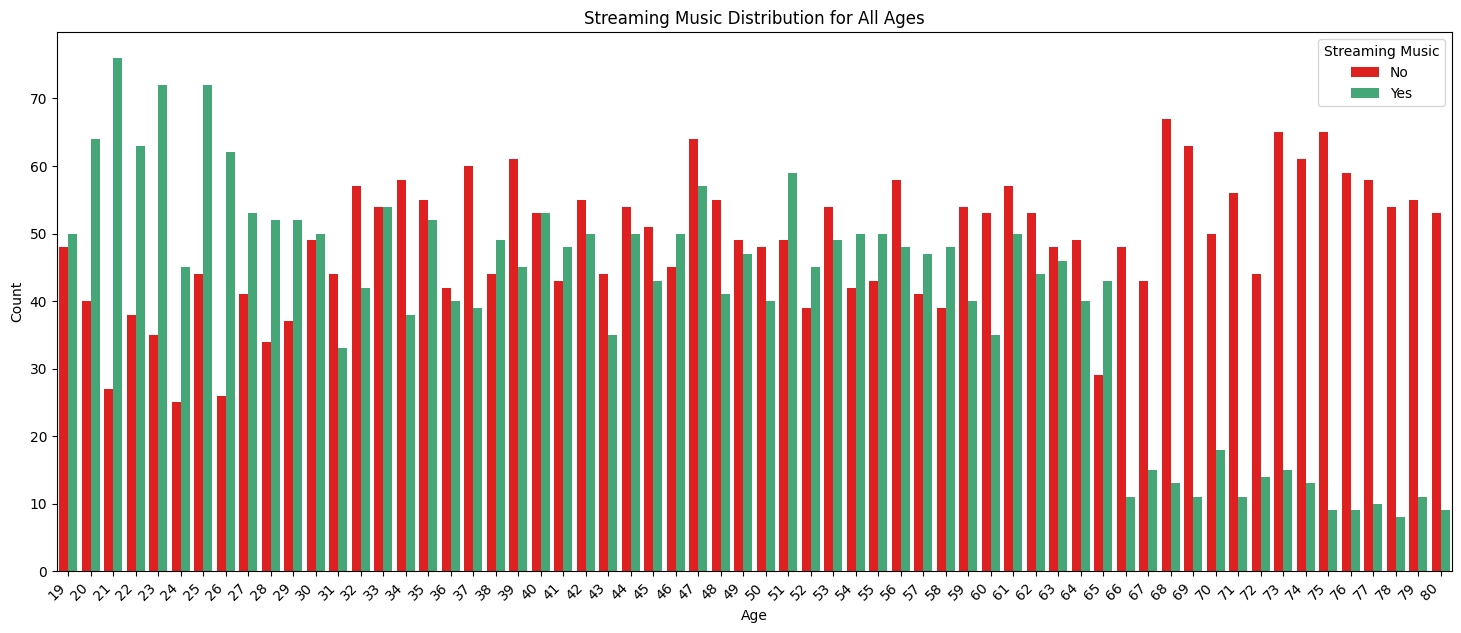

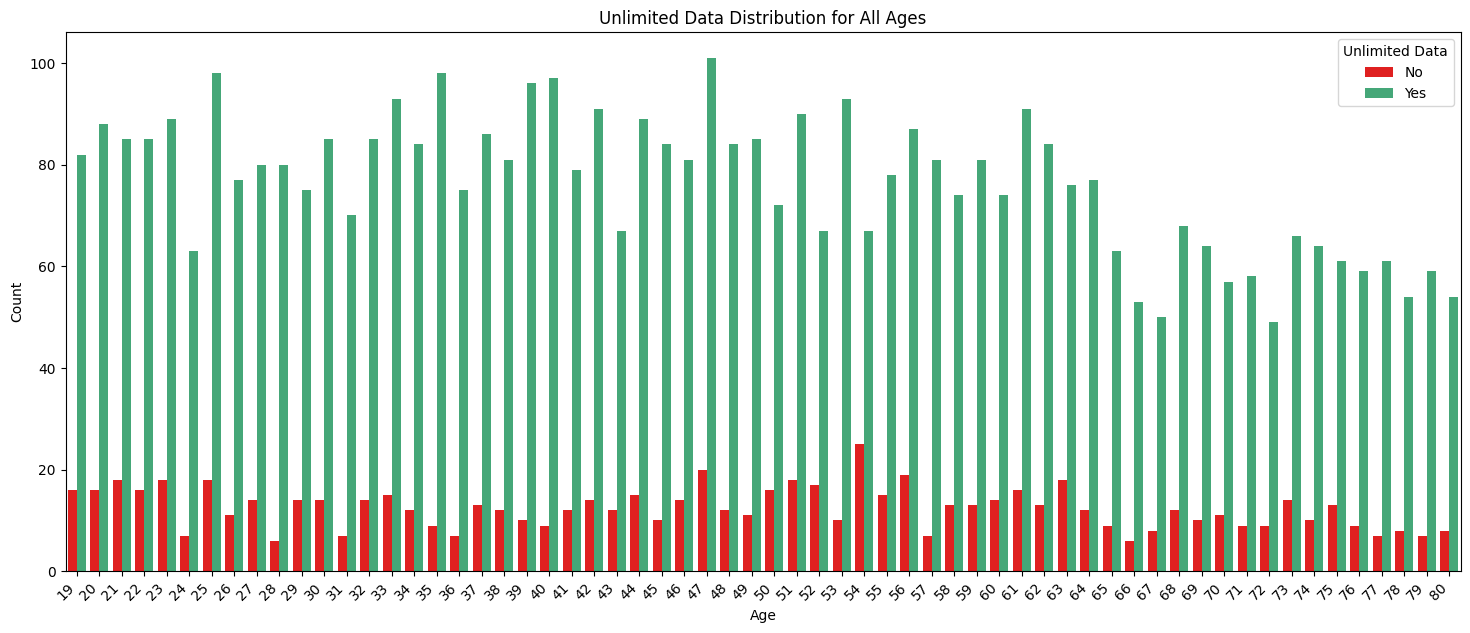

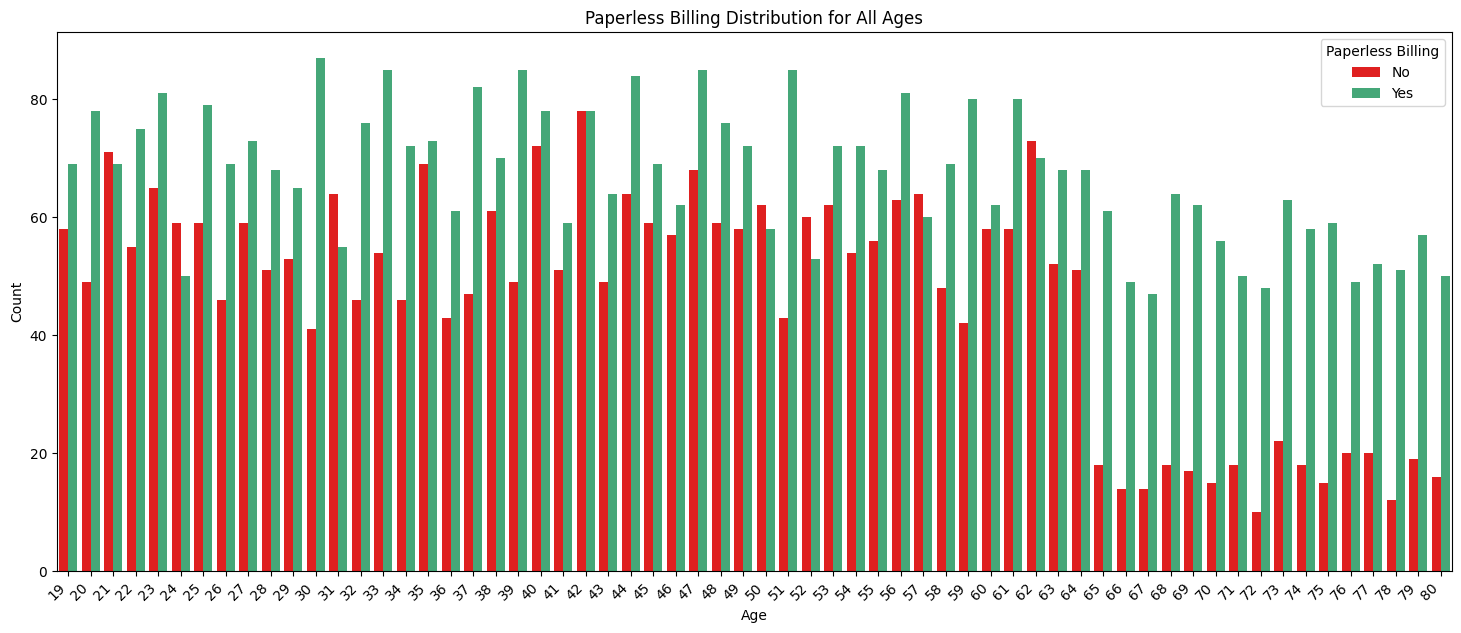

In [57]:
# --------------------------------------------
# 👵 Service Subscription Analysis Across All Age Groups
# --------------------------------------------

# Import necessary libraries
# seaborn → for creating informative and attractive statistical graphics
# warnings → to suppress non-critical warning messages
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --------------------------------------------
# 🧾 Defining Service-Related Columns
# --------------------------------------------

service_cols_to_plot = [
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Paperless Billing'
]

# --------------------------------------------
# 👶 Using All Ages Instead of Filtering Top 20
# --------------------------------------------

# As per user request, include all ages for a comprehensive view
# Copying the full DataFrame to preserve the original data
df_all_ages = df.copy()

# --------------------------------------------
# 📊 Plot Service Distribution by Age
# --------------------------------------------

# Loop through each service column to analyze how subscriptions vary across ages
for col in service_cols_to_plot:
    # Ensure the column exists in the dataset
    if col in df_all_ages.columns:
        # Group data by Age and the current service column, then count the number of records
        counts = df_all_ages.groupby(['Age', col]).size().reset_index(name='Count')

        # Set figure size for better readability
        plt.figure(figsize=(18, 7))

        # Define a custom color palette:
        # Highlight 'No' in red for quick visual distinction
        custom_palette = {
            category: 'red' if 'No' in str(category) else color
            for category, color in zip(
                counts[col].unique(),
                sns.color_palette('viridis', n_colors=len(counts[col].unique()))
            )
        }

        # Create a bar plot showing service distribution across age groups
        sns.barplot(x='Age', y='Count', hue=col, data=counts, palette=custom_palette)

        # Adjust x-axis label orientation for better visibility
        plt.xticks(rotation=45, ha='right')

        # Add a dynamic title for clarity
        plt.title(f'{col} Distribution for All Ages')

        # Display the plot
        plt.show()

    else:
        # Warn if an expected column is missing
        print(f"Column '{col}' not found in the DataFrame.")

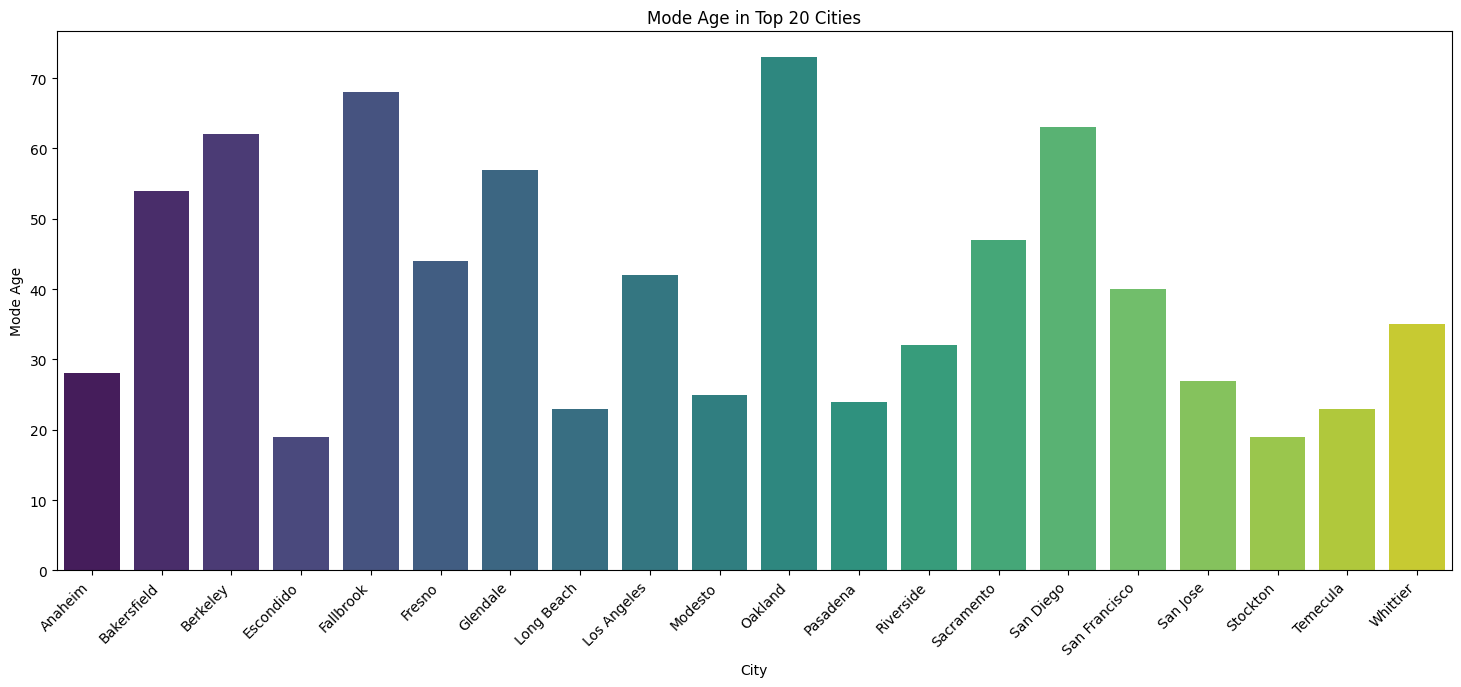

In [58]:
# --------------------------------------------
# 👶 Mode Age Analysis by City
# --------------------------------------------

# Calculate the mode (most common) age for each city
# Note: mode() can return multiple values if there are ties,
# so we select the first mode in such cases
mode_age_by_city = df.groupby('City')['Age'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index(name='Mode_Age')

# For clearer visualization, focus on the top 20 cities by customer count
top_20_cities = df['City'].value_counts().nlargest(20).index
mode_age_top_cities = mode_age_by_city[mode_age_by_city['City'].isin(top_20_cities)]

# --------------------------------------------
# 📊 Visualize Mode Age for Top 20 Cities
# --------------------------------------------

plt.figure(figsize=(18, 7))

# Bar plot showing the most common age in each of the top 20 cities
sns.barplot(x='City', y='Mode_Age', data=mode_age_top_cities, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and y-axis label for clarity
plt.title('Mode Age in Top 20 Cities')
plt.ylabel('Mode Age')

# Display the plot
plt.show()

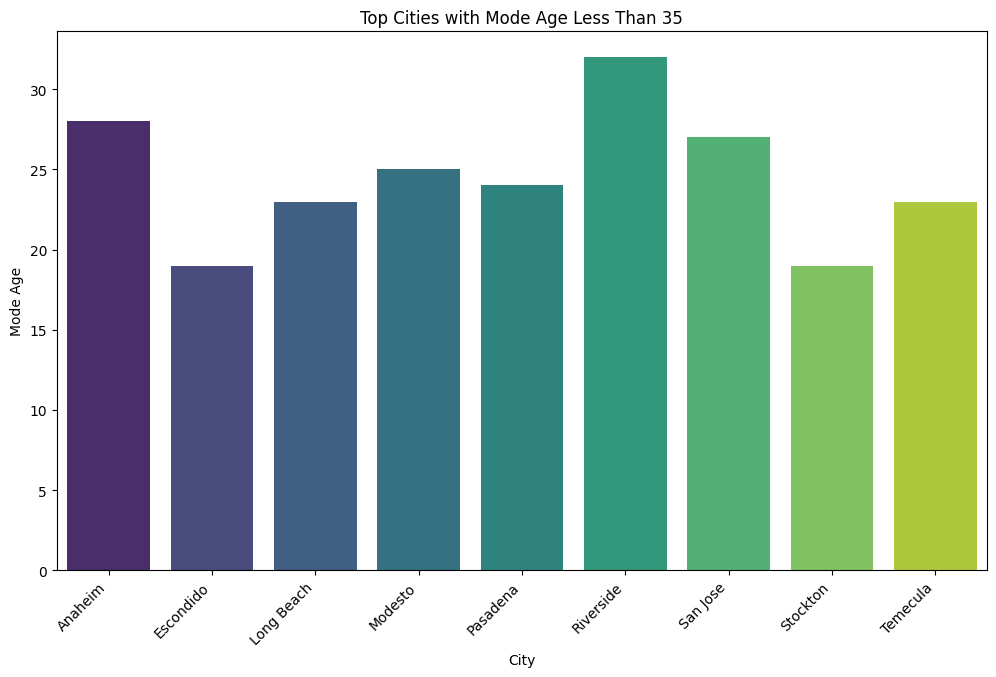

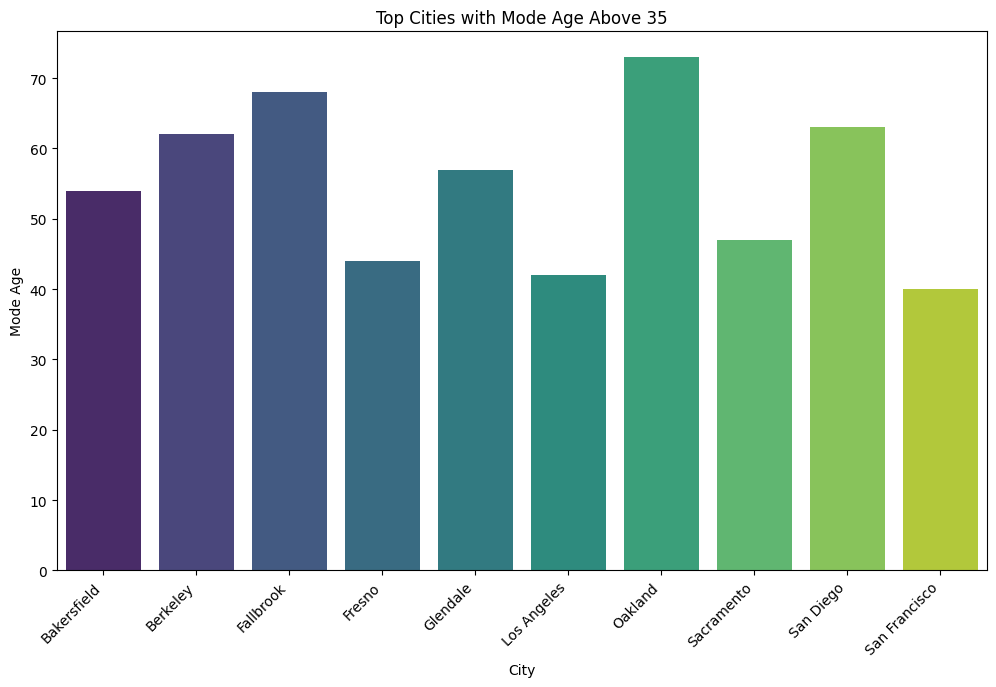

In [59]:
# --------------------------------------------
# 👶 Mode Age Segmentation: Cities Below and Above 35
# --------------------------------------------

# Filter top cities where the mode age is less than 35
mode_age_less_than_35 = mode_age_top_cities[mode_age_top_cities['Mode_Age'] < 35]

# Visualize top cities with mode age below 35
plt.figure(figsize=(12, 7))
sns.barplot(x='City', y='Mode_Age', data=mode_age_less_than_35, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top Cities with Mode Age Less Than 35')
plt.ylabel('Mode Age')
plt.show()

# Filter top cities where the mode age is above 35
mode_age_above_35 = mode_age_top_cities[mode_age_top_cities['Mode_Age'] > 35]

# Visualize top cities with mode age above 35
plt.figure(figsize=(12, 7))
sns.barplot(x='City', y='Mode_Age', data=mode_age_above_35, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top Cities with Mode Age Above 35')
plt.ylabel('Mode Age')
plt.show()

In [60]:
print(df.isnull().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

## Impute Remaining Missing Values

### Subtask:
Identify and impute the missing values in columns that were not previously handled.

**Reasoning**:
Based on the latest `df.isnull().sum()` output, impute the remaining missing values in 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', and 'Unlimited Data' using the appropriate methods (median for numerical, 'No Service' for categorical).

In [61]:
# --------------------------------------------
# 🧹 Handling Missing Values (Data Imputation)
# --------------------------------------------

# ------------------------------
# Impute Numerical Columns with Median
# ------------------------------

# 'Avg Monthly Long Distance Charges' → fill missing values with the median
if 'Avg Monthly Long Distance Charges' in df.columns and df['Avg Monthly Long Distance Charges'].isnull().sum() > 0:
    df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(
        df['Avg Monthly Long Distance Charges'].median()
    )
    print("Imputed 'Avg Monthly Long Distance Charges' with median.")
else:
    print("'Avg Monthly Long Distance Charges' does not have missing values or column not found.")

# 'Avg Monthly GB Download' → fill missing values with the median
if 'Avg Monthly GB Download' in df.columns and df['Avg Monthly GB Download'].isnull().sum() > 0:
    df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(
        df['Avg Monthly GB Download'].median()
    )
    print("Imputed 'Avg Monthly GB Download' with median.")
else:
    print("'Avg Monthly GB Download' does not have missing values or column not found.")

# ------------------------------
# Impute Categorical Columns with 'unknown'
# ------------------------------

categorical_cols_to_impute = [
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data'
]

# Loop through each categorical column and fill missing values with 'unknown'
for col in categorical_cols_to_impute:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('unknown')
        print(f"Imputed '{col}' with 'unknown'.")
    else:
        print(f"'{col}' does not have missing values or column not found.")

# ------------------------------
# Verify Missing Values After Imputation
# ------------------------------

print("\nMissing values after imputation:")
print(df.isnull().sum())

Imputed 'Avg Monthly Long Distance Charges' with median.
Imputed 'Avg Monthly GB Download' with median.
Imputed 'Multiple Lines' with 'unknown'.
Imputed 'Online Security' with 'unknown'.
Imputed 'Online Backup' with 'unknown'.
Imputed 'Device Protection Plan' with 'unknown'.
Imputed 'Premium Tech Support' with 'unknown'.
Imputed 'Streaming TV' with 'unknown'.
Imputed 'Streaming Movies' with 'unknown'.
Imputed 'Streaming Music' with 'unknown'.
Imputed 'Unlimited Data' with 'unknown'.

Missing values after imputation:
Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Serv

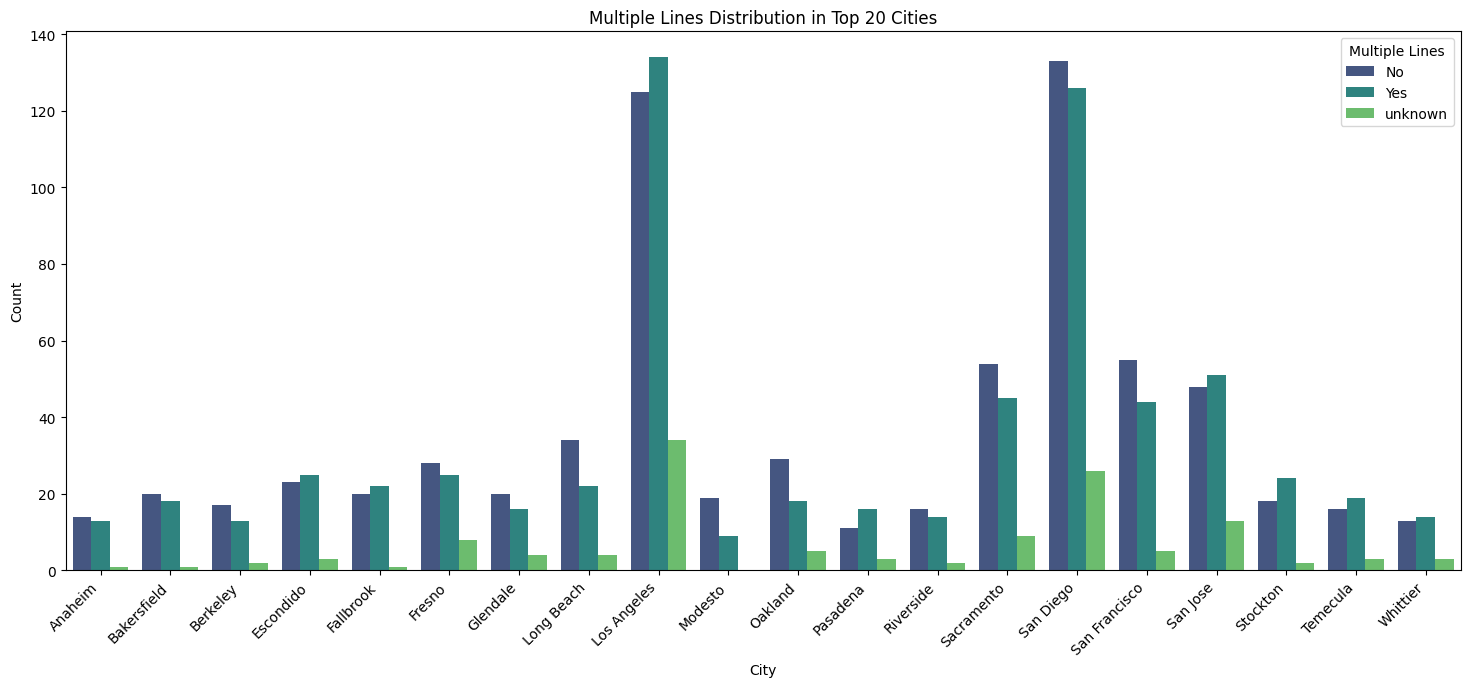

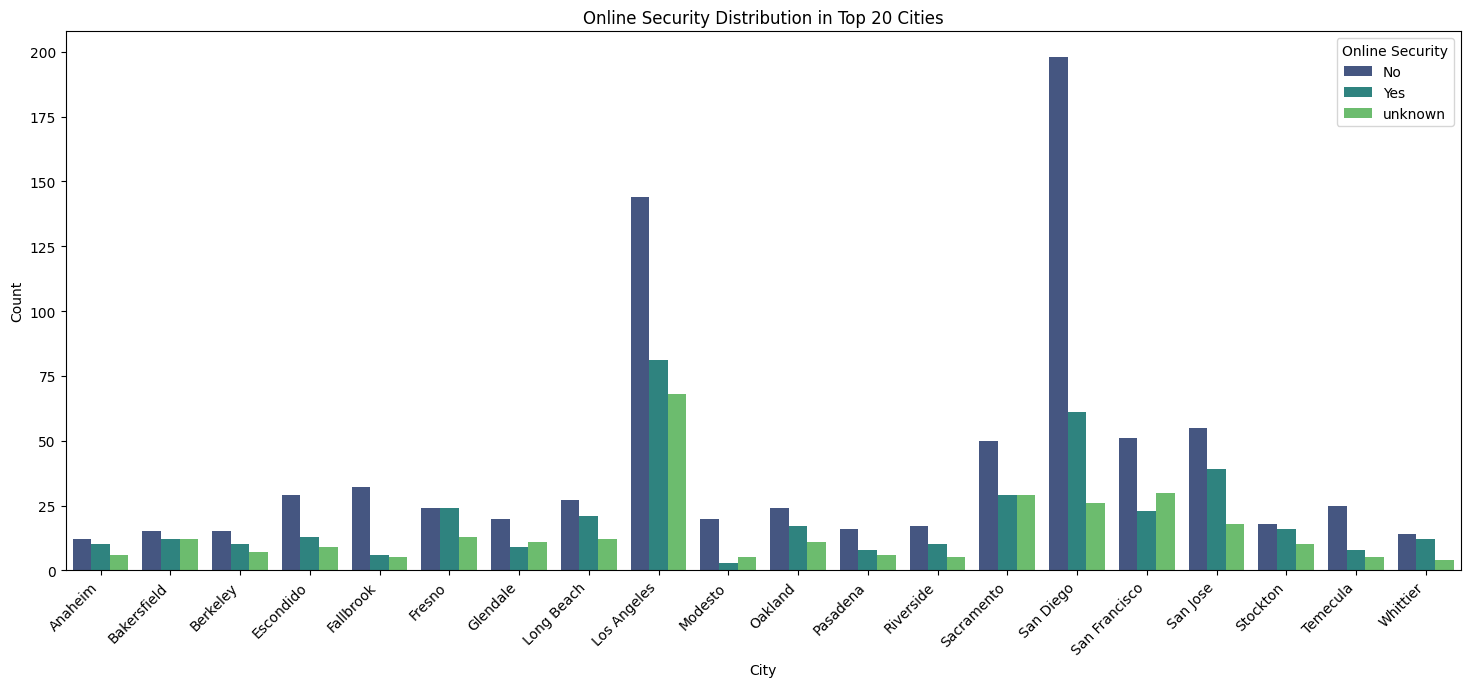

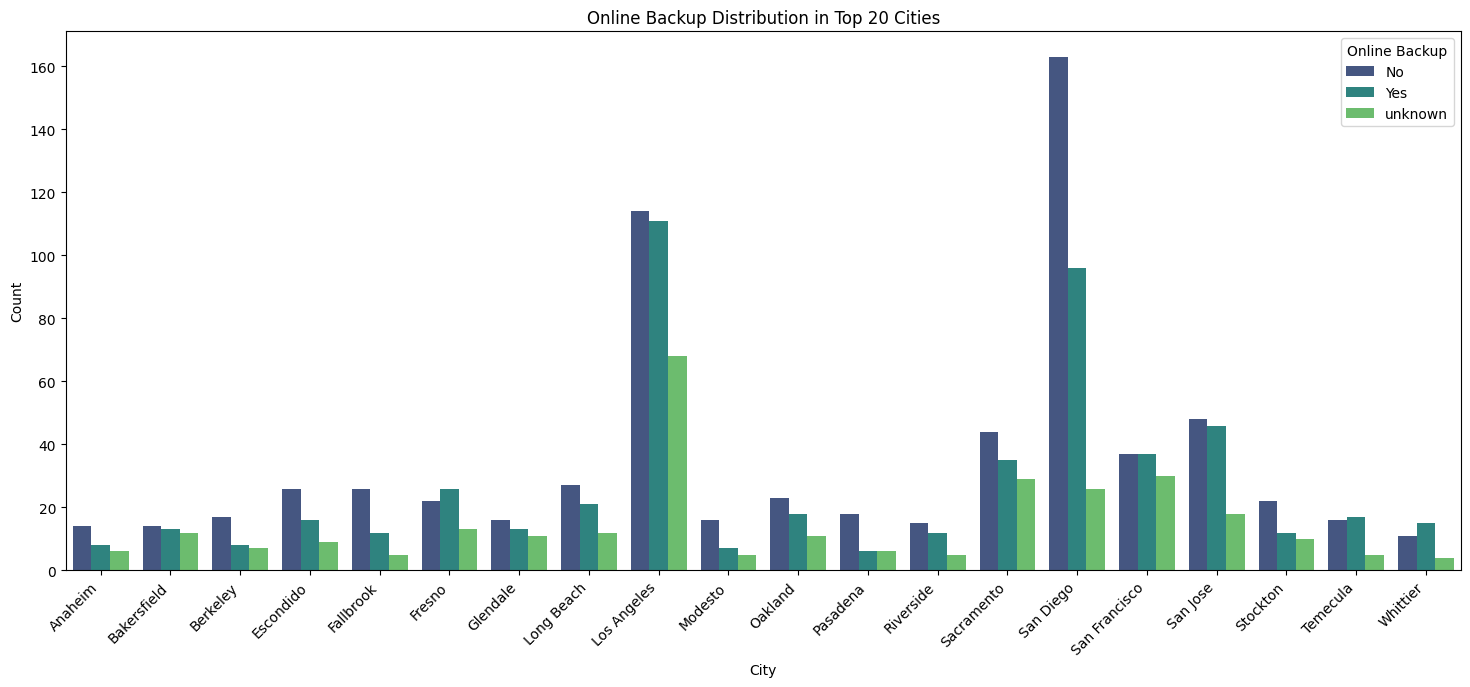

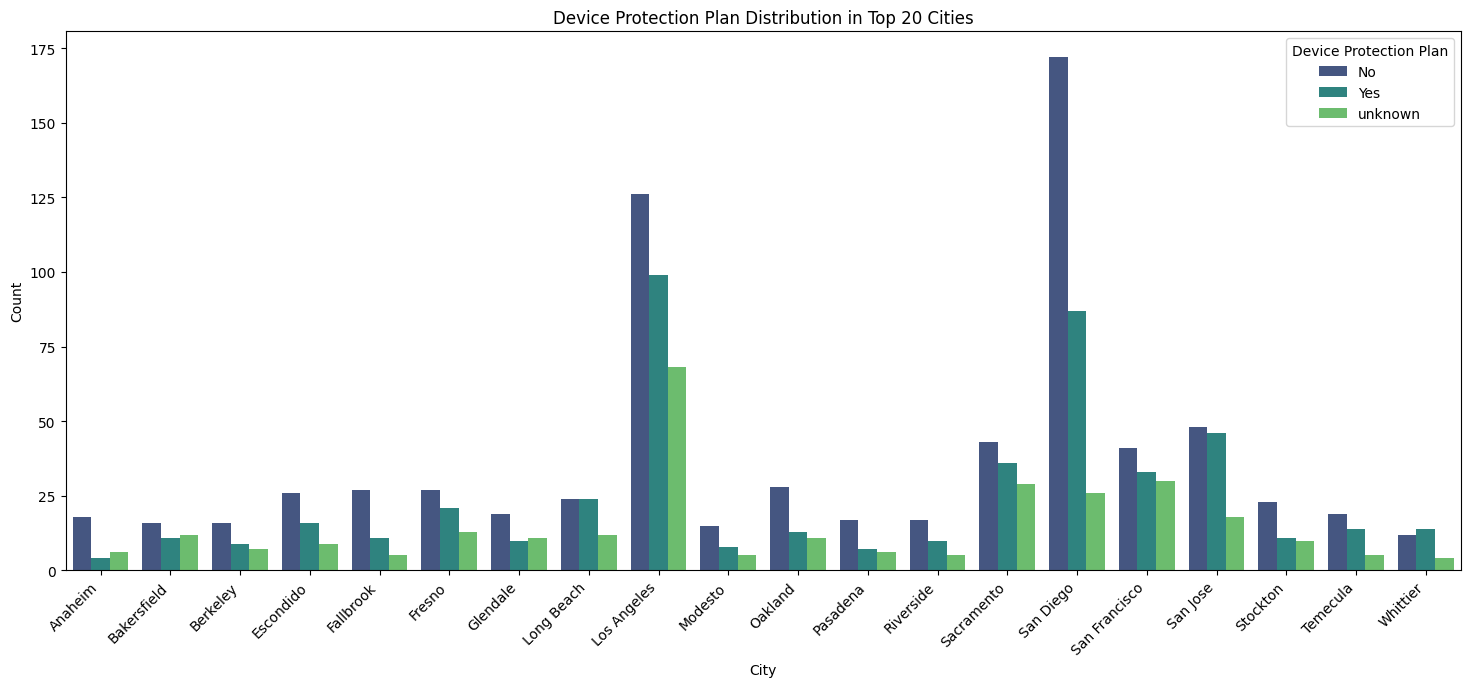

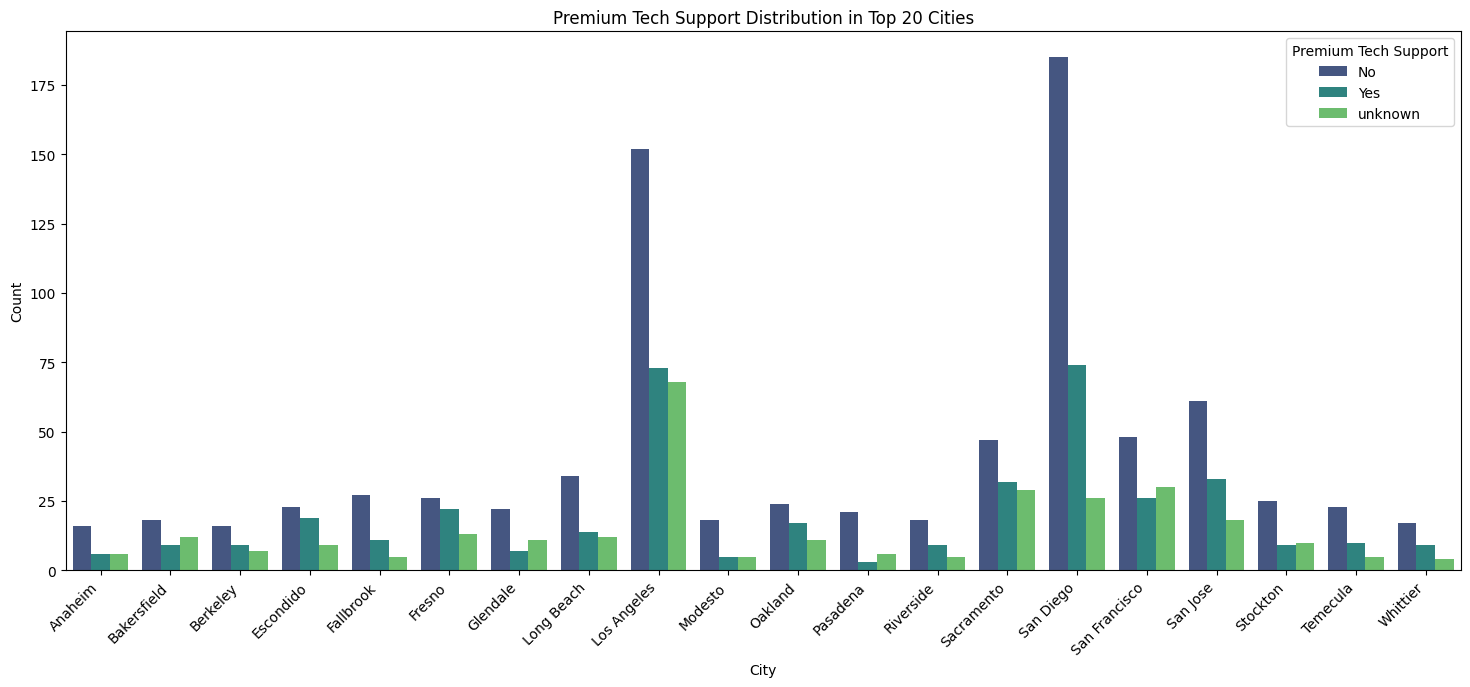

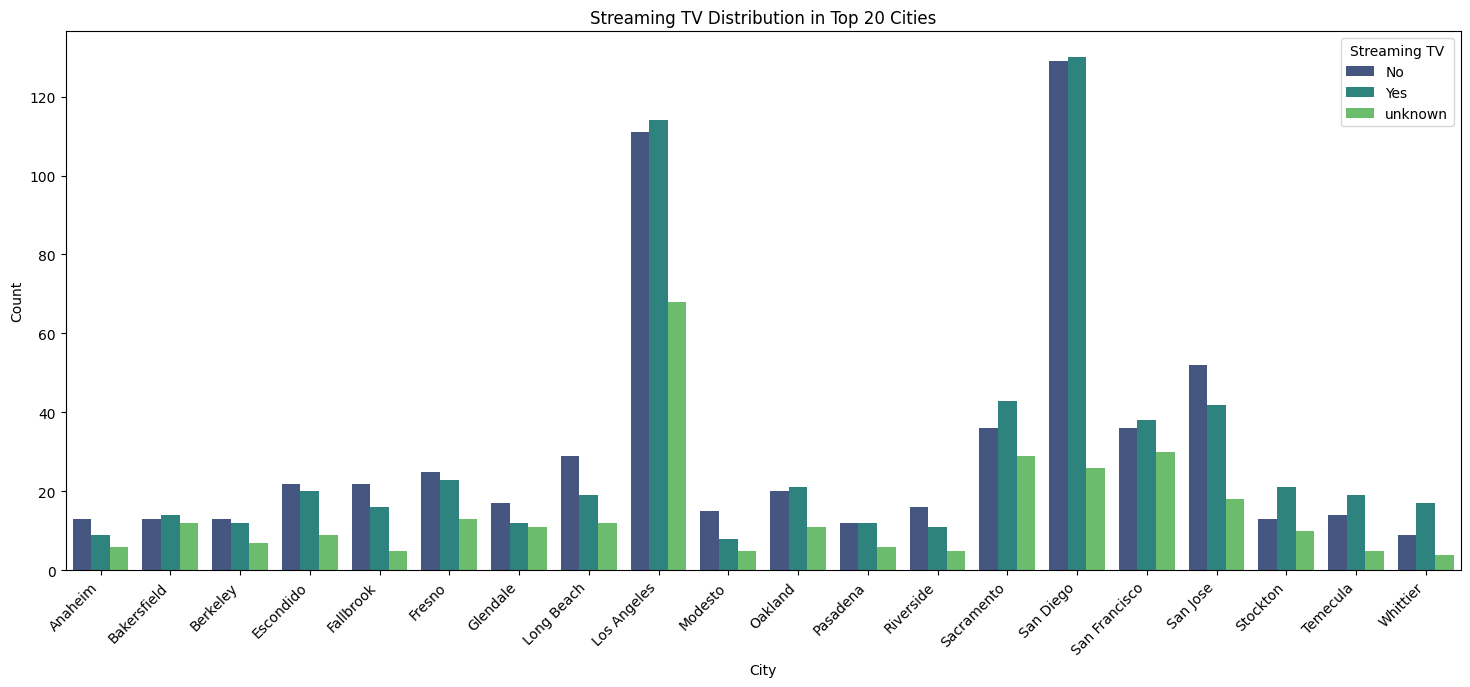

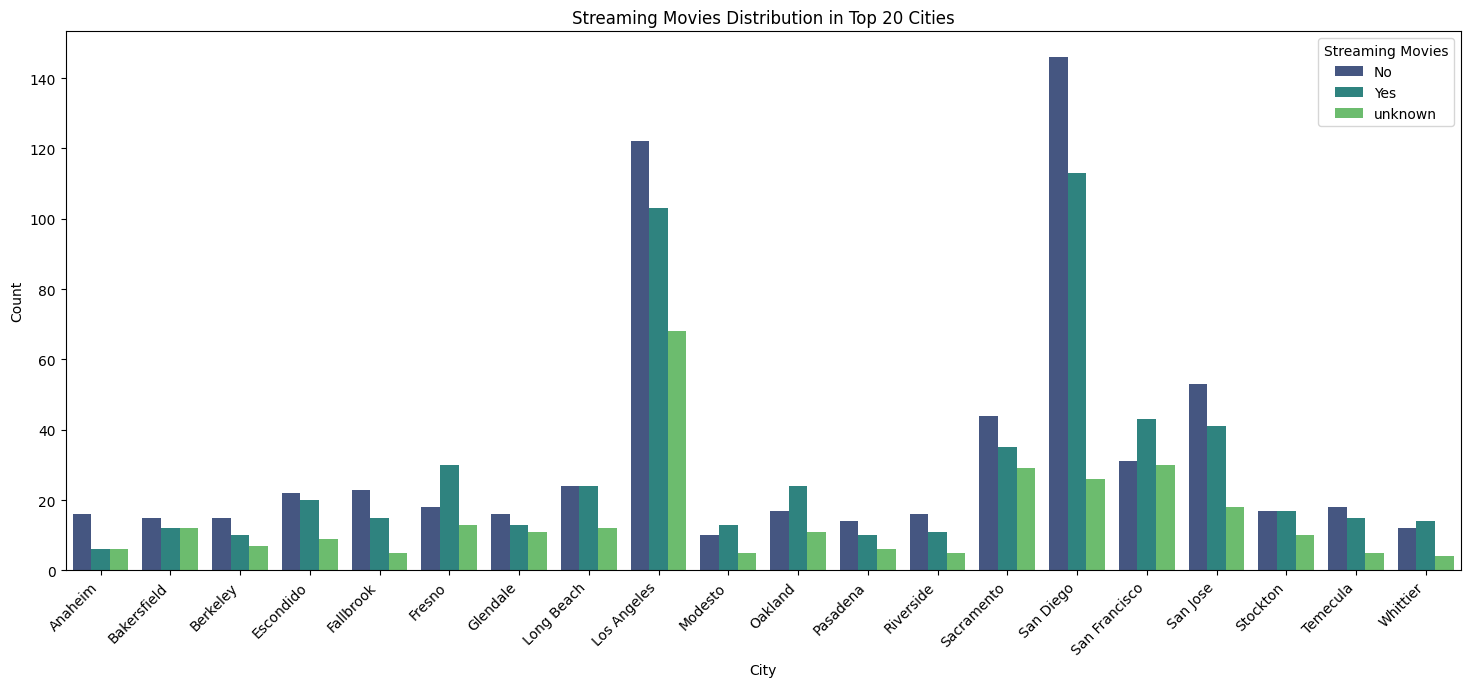

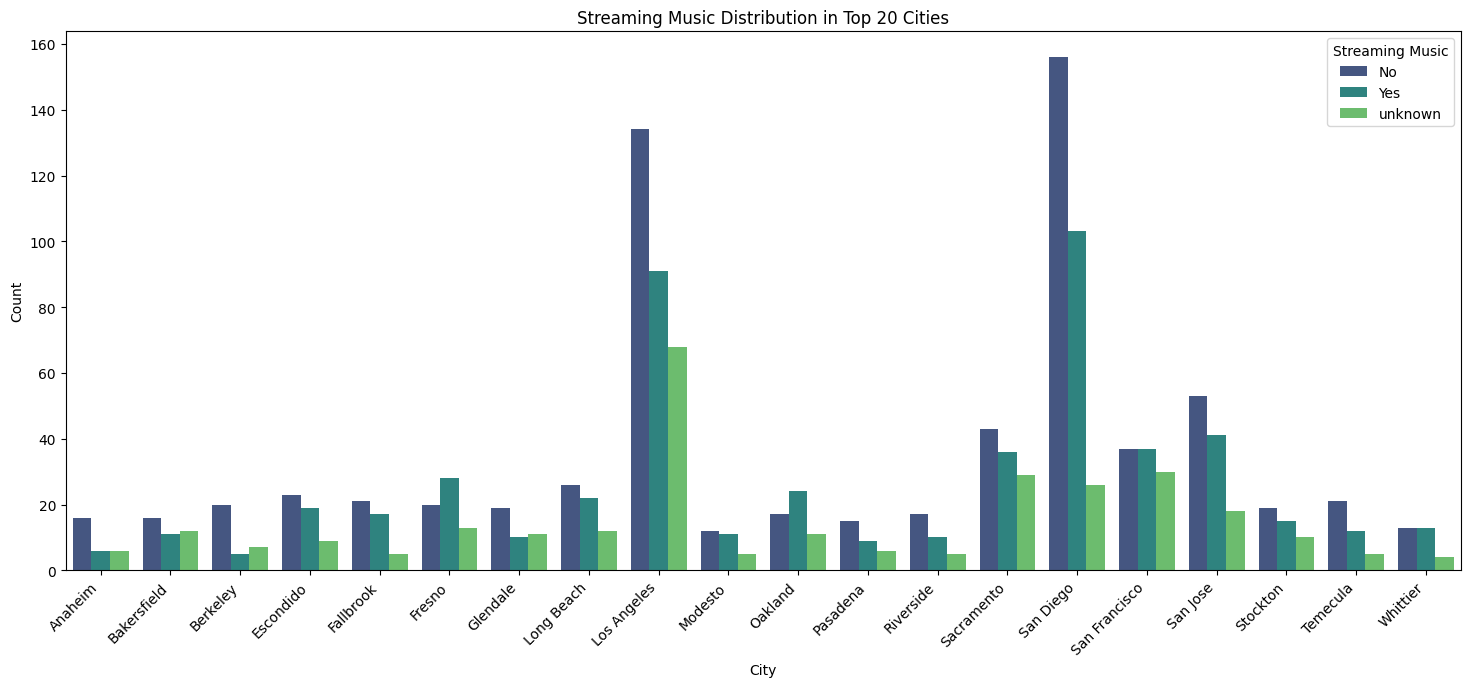

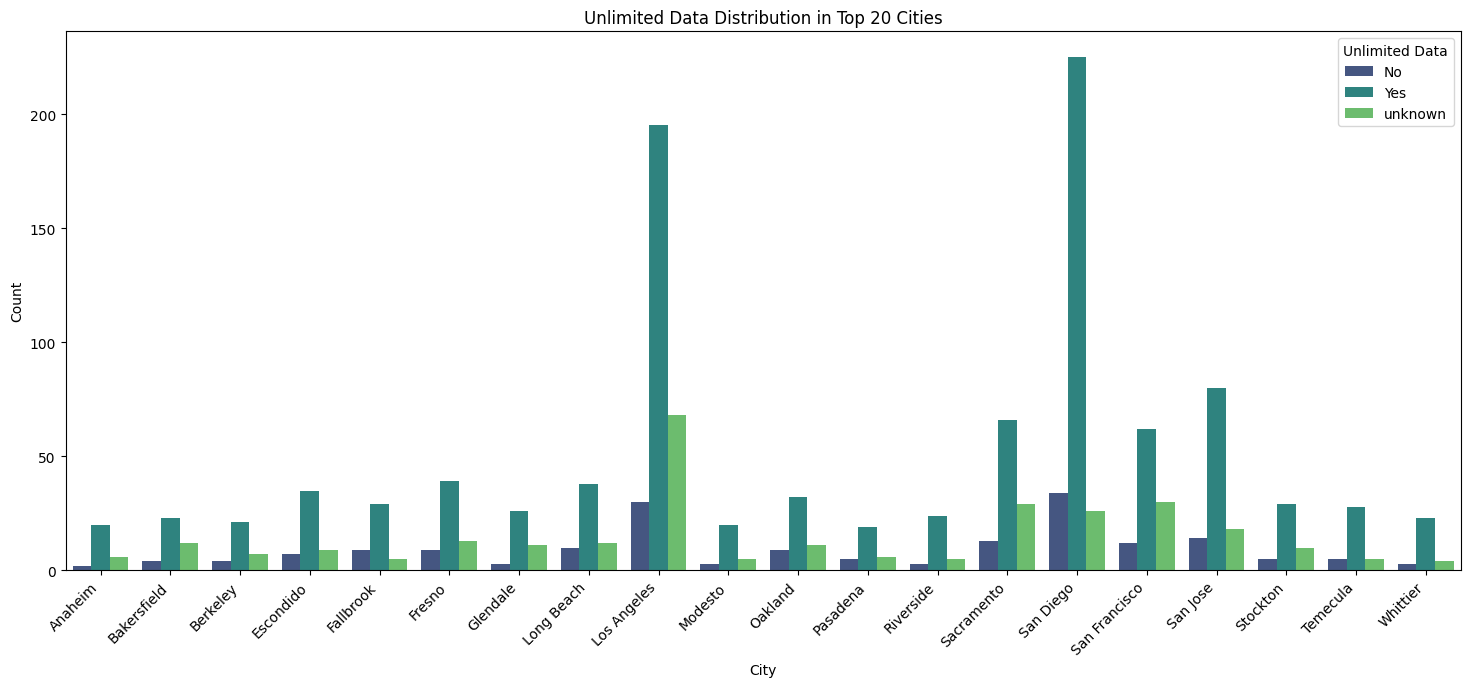

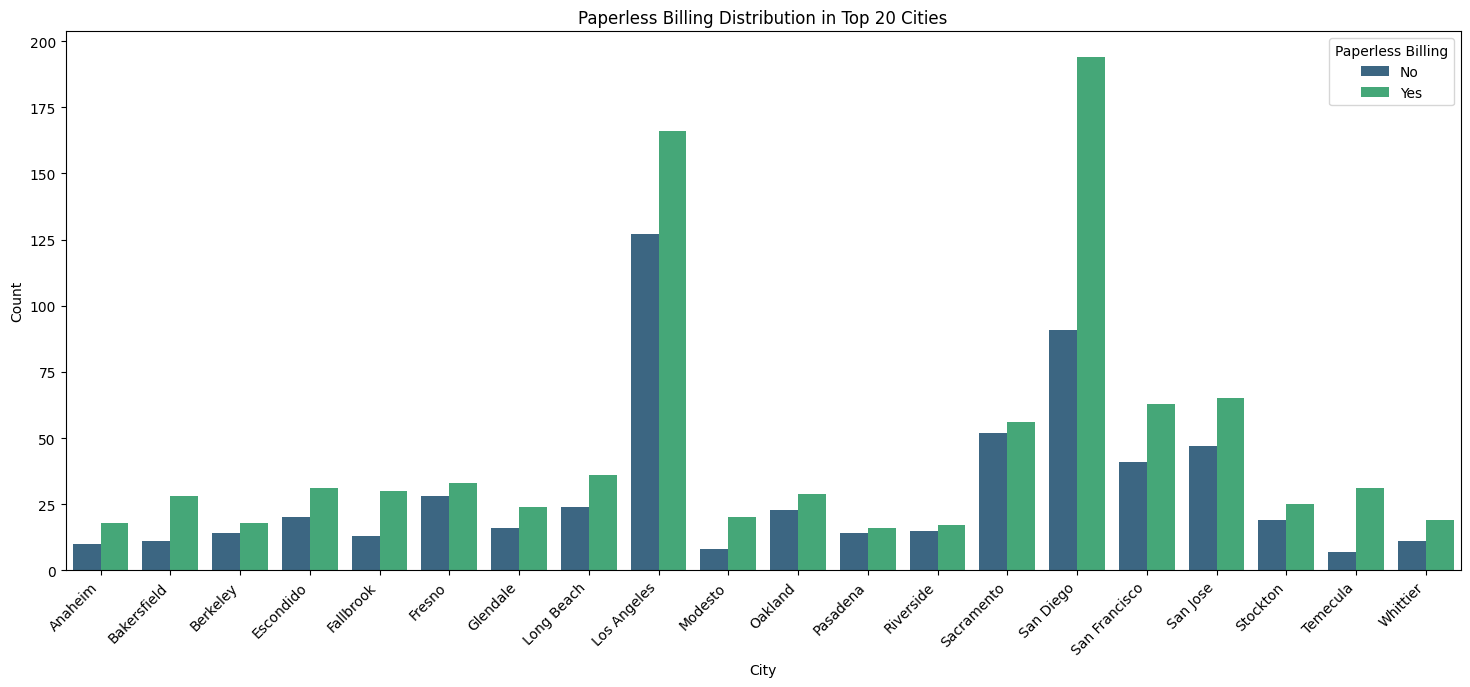

In [62]:
# --------------------------------------------
# 🏙️ Service Subscription Analysis in Top 20 Cities
# --------------------------------------------

# List of service-related columns to analyze (including Paperless Billing)
service_cols_to_plot = [
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Paperless Billing'
]

# Identify the top 20 cities by customer count
top_20_cities = df['City'].value_counts().nlargest(20).index

# Filter the DataFrame to include only these top 20 cities
df_top_cities = df[df['City'].isin(top_20_cities)]

# Loop through each service column to visualize its distribution across top cities
for col in service_cols_to_plot:
    # Check if the column exists in the filtered DataFrame
    if col in df_top_cities.columns:
        # Group data by City and the service column, then count occurrences
        counts = df_top_cities.groupby(['City', col]).size().reset_index(name='Count')

        # Set figure size for better readability
        plt.figure(figsize=(18, 7))

        # Create a bar plot showing service subscription counts per city
        sns.barplot(x='City', y='Count', hue=col, data=counts, palette='viridis')

        # Rotate x-axis labels to prevent overlap
        plt.xticks(rotation=45, ha='right')

        # Add a descriptive title for each service feature
        plt.title(f'{col} Distribution in Top 20 Cities')

        # Display the plot
        plt.show()
    else:
        # Print message if the column is missing
        print(f"Column '{col}' not found in the DataFrame.")

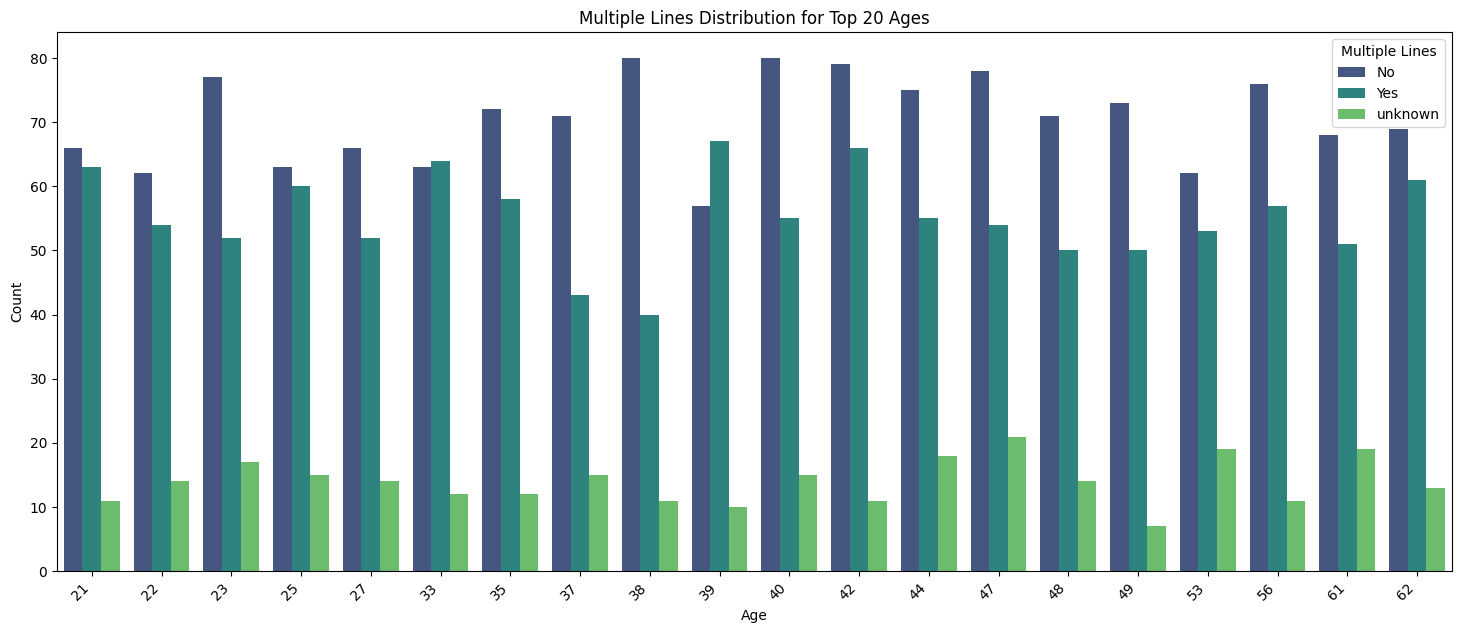

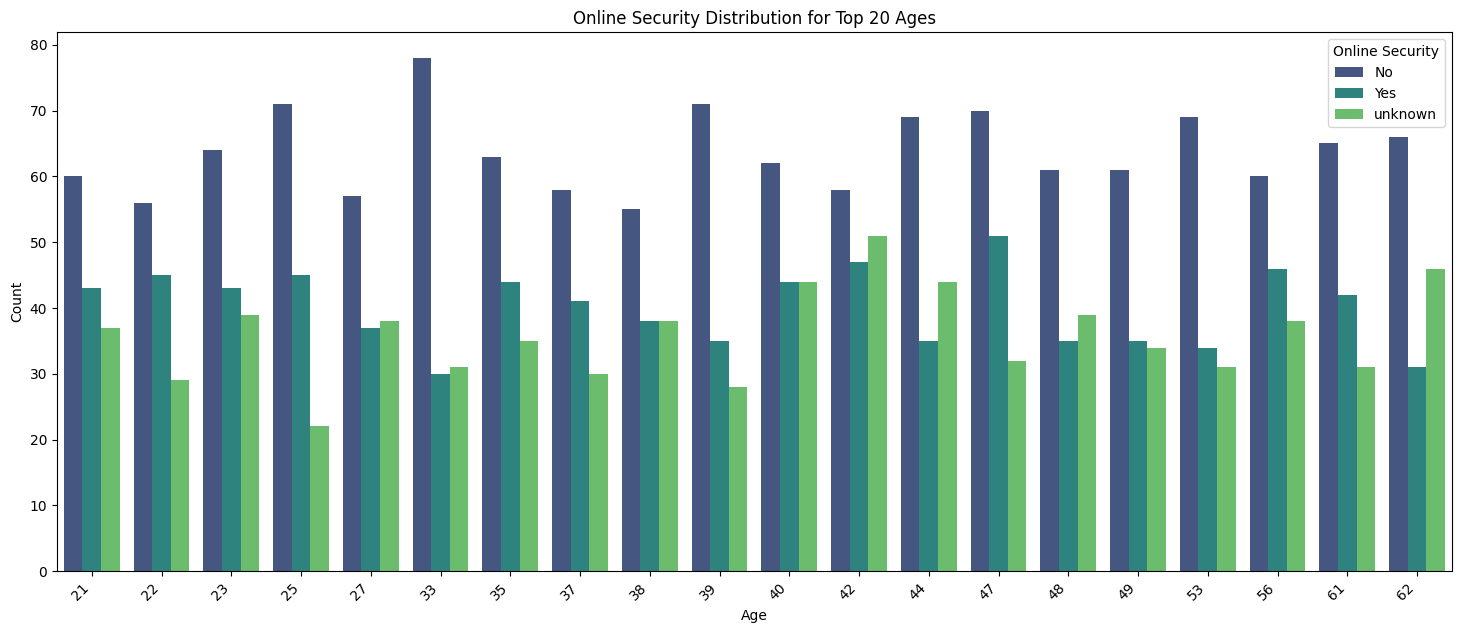

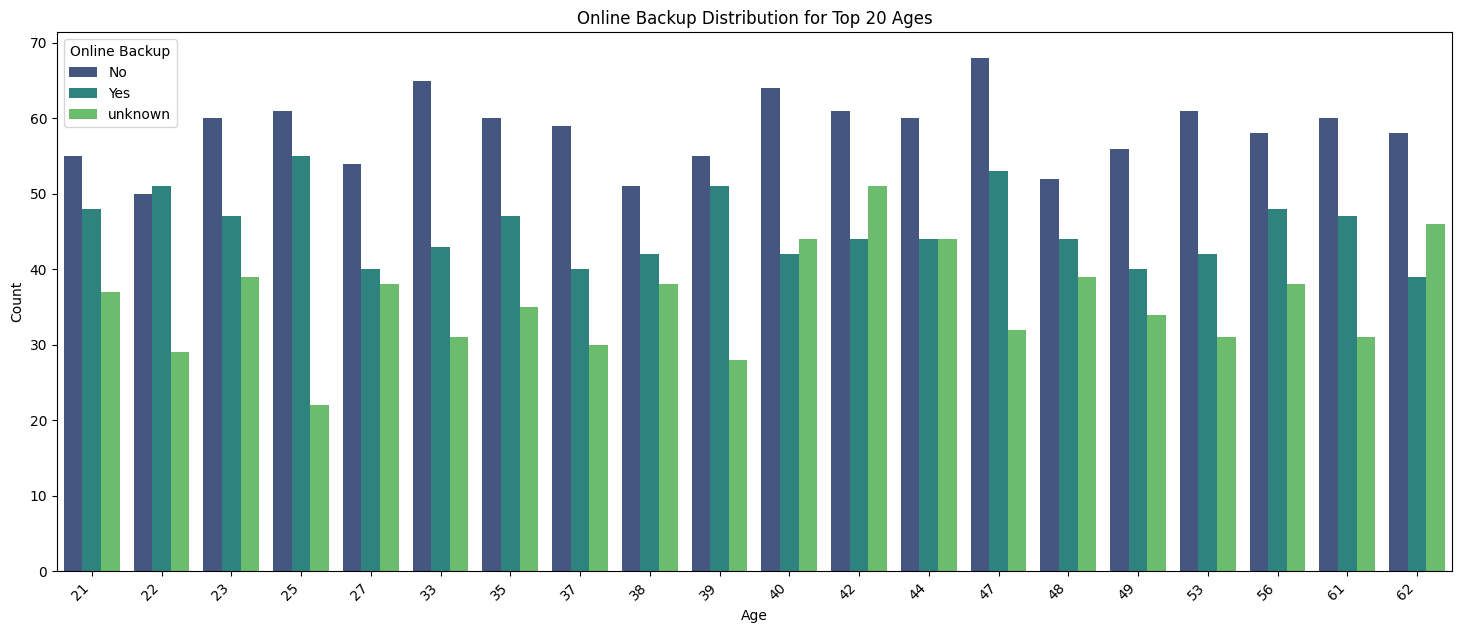

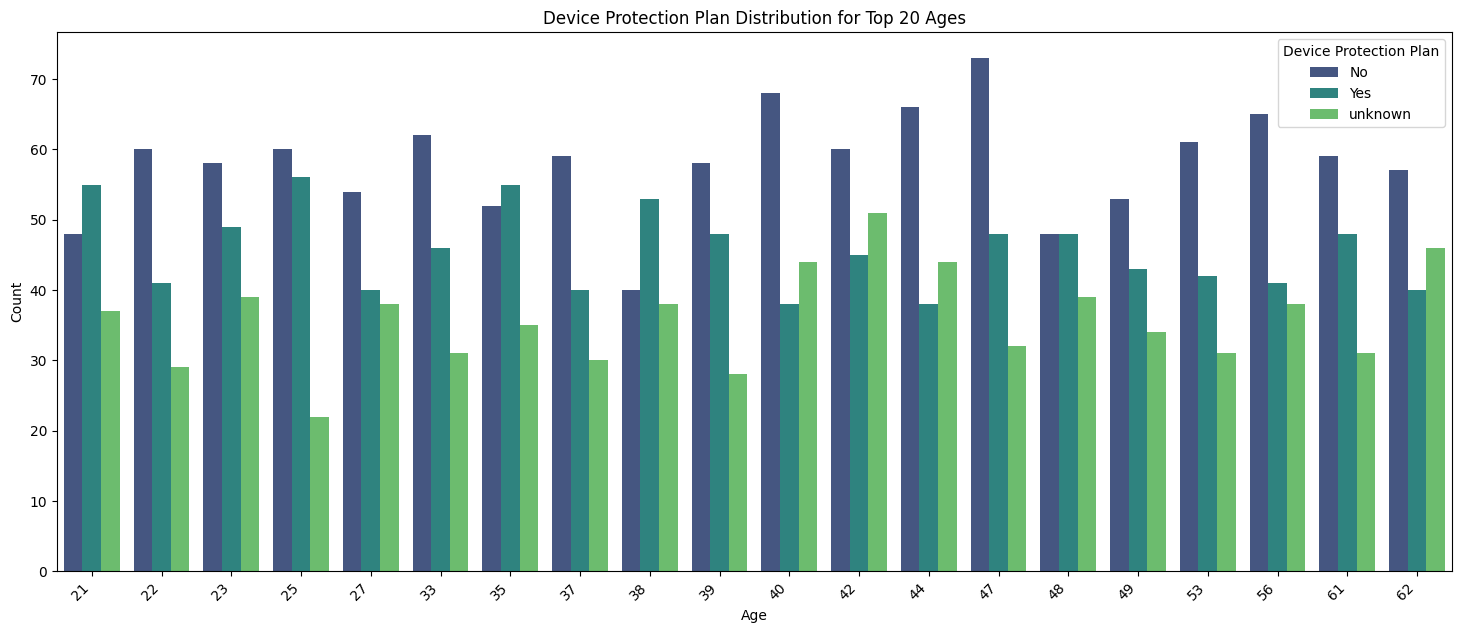

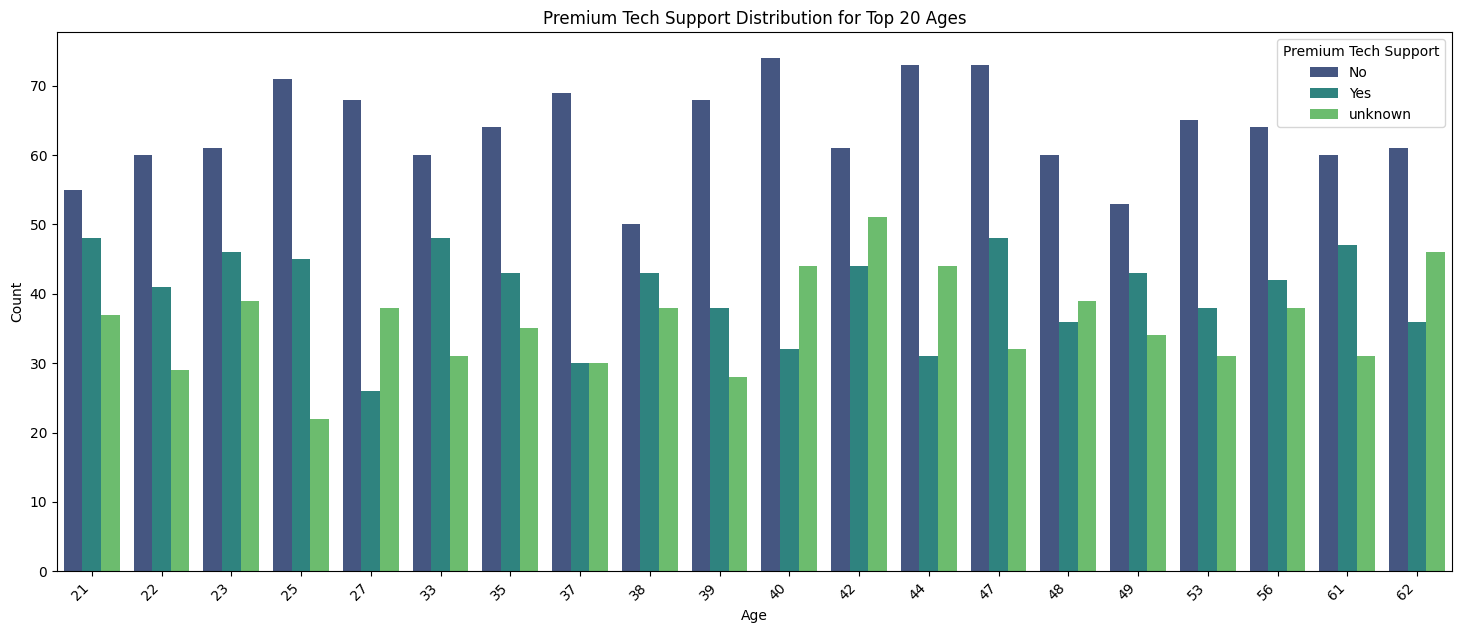

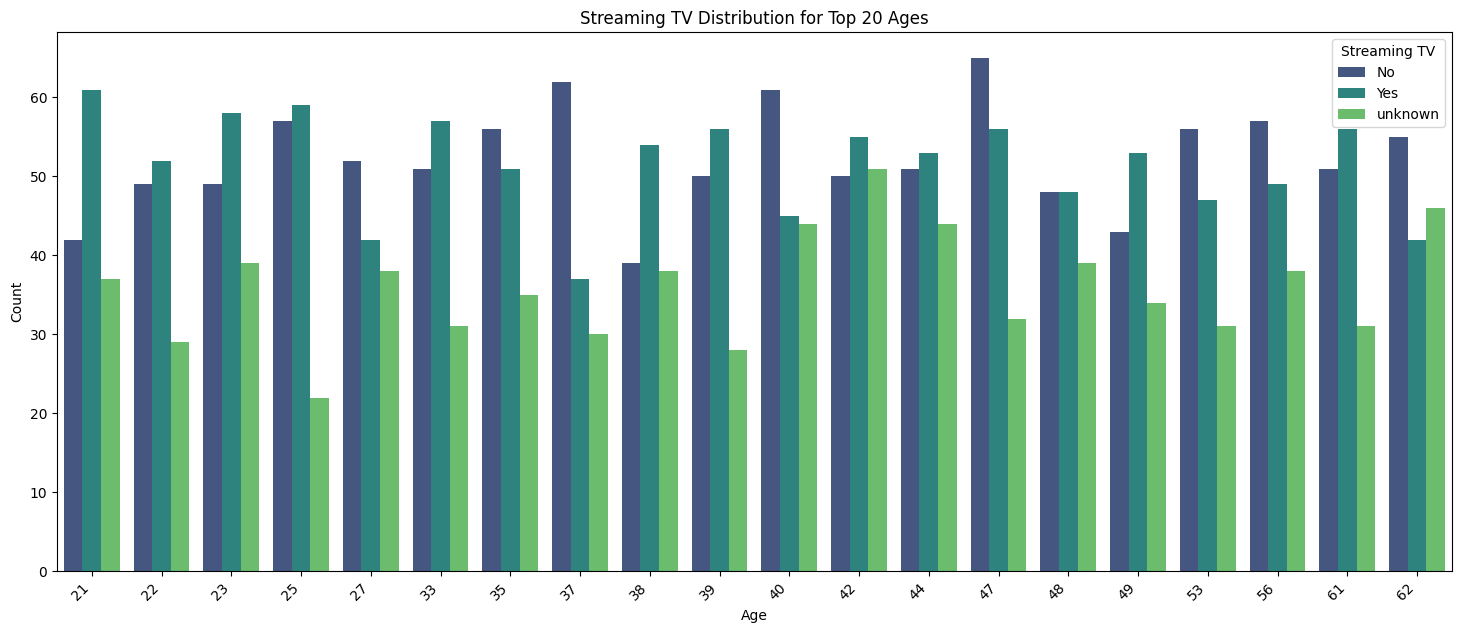

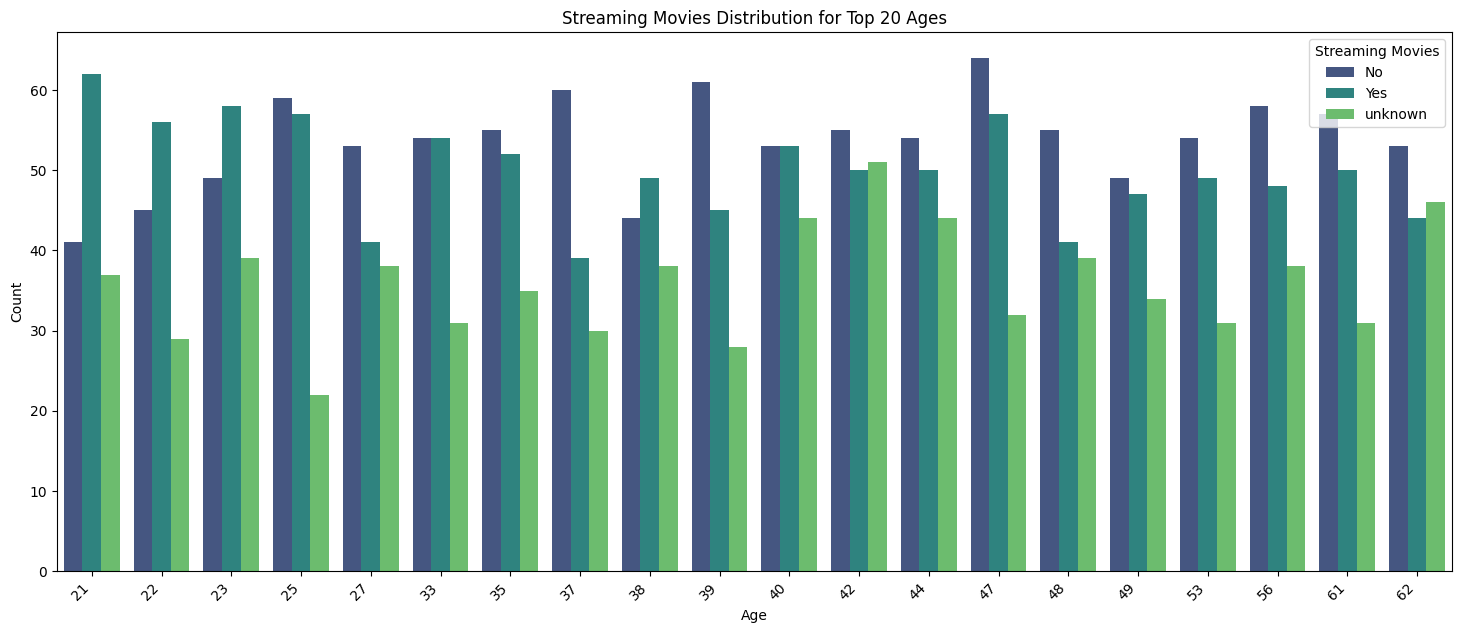

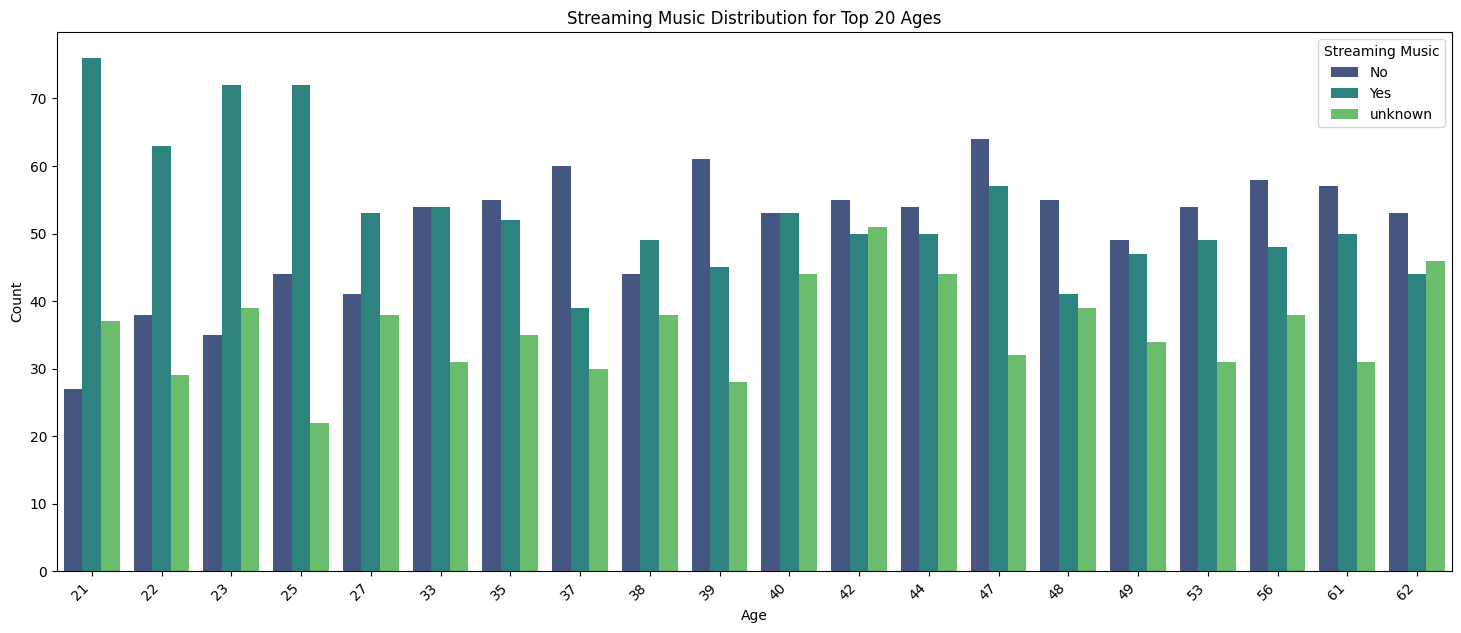

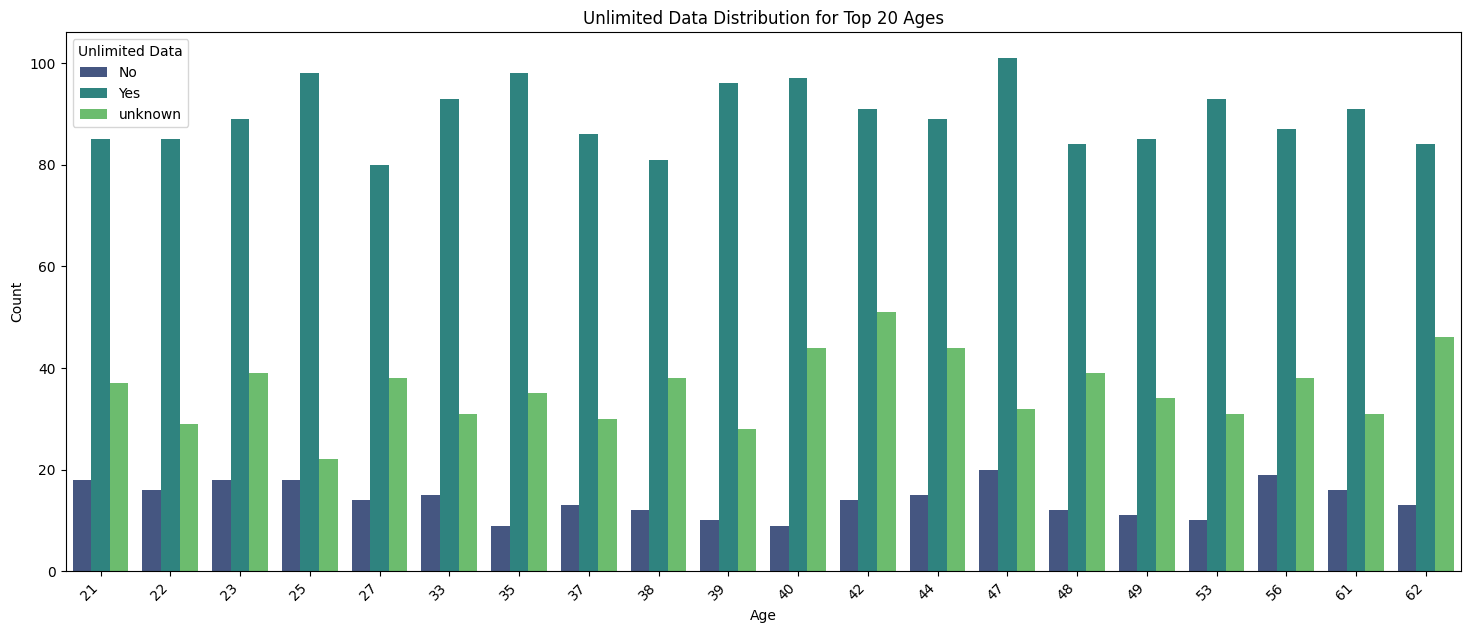

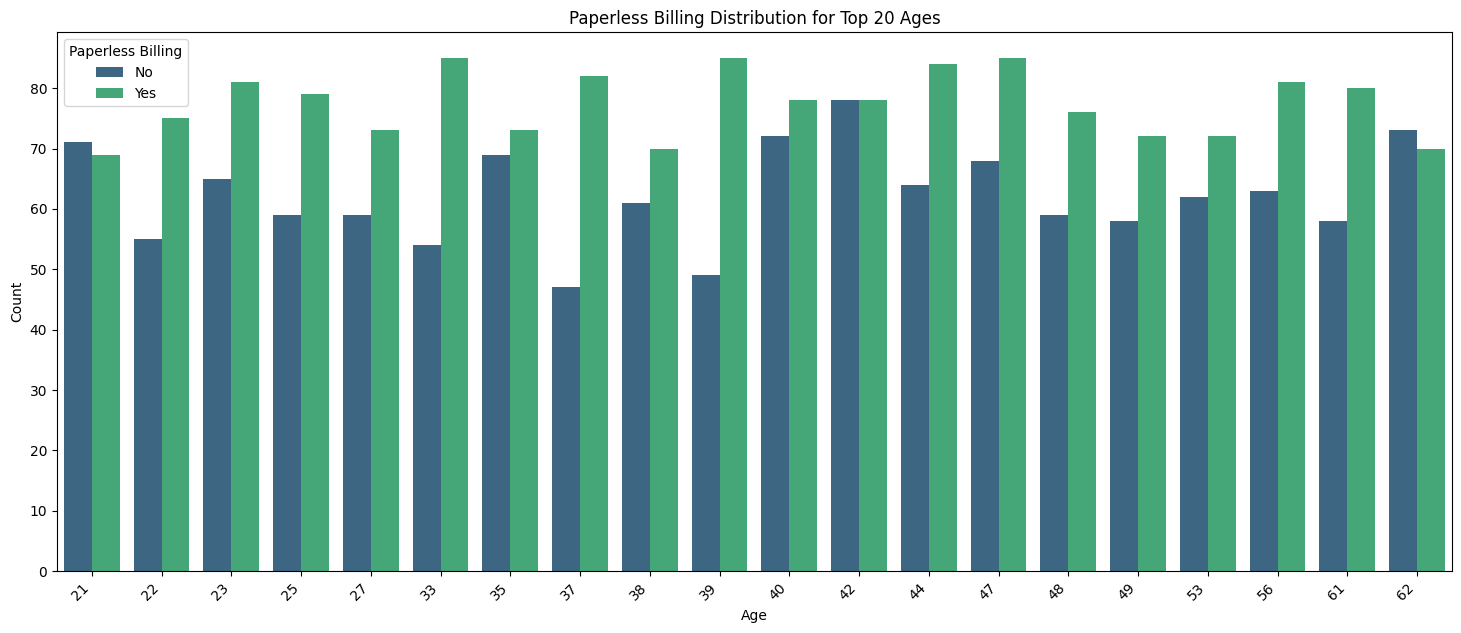

In [63]:
# --------------------------------------------
# 👶 Service Subscription Analysis for Top 20 Ages
# --------------------------------------------

# List of service-related columns to analyze (including Paperless Billing)
service_cols_to_plot = [
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Paperless Billing'
]

# Identify the top 20 most common ages in the dataset
top_20_ages = df['Age'].value_counts().nlargest(20).index

# Filter the DataFrame to include only customers in the top 20 age groups
df_top_ages = df[df['Age'].isin(top_20_ages)]

# Loop through each service column to visualize distribution across top ages
for col in service_cols_to_plot:
    # Ensure the column exists in the filtered DataFrame
    if col in df_top_ages.columns:
        # Group data by Age and the current service column, then count occurrences
        counts = df_top_ages.groupby(['Age', col]).size().reset_index(name='Count')

        # Set figure size for better readability
        plt.figure(figsize=(18, 7))

        # Create a bar plot showing service subscription counts by age
        sns.barplot(x='Age', y='Count', hue=col, data=counts, palette='viridis')

        # Rotate x-axis labels for clarity
        plt.xticks(rotation=45, ha='right')

        # Add a descriptive title for each service feature
        plt.title(f'{col} Distribution for Top 20 Ages')

        # Display the plot
        plt.show()
    else:
        # Print message if the column is missing
        print(f"Column '{col}' not found in the DataFrame.")

## Identify Categorical and Numerical Features

### Subtask:
Create lists of categorical and numerical column names.

**Reasoning**:
Based on the understanding of the dataset, create lists containing the names of categorical and numerical columns.

In [64]:
# --------------------------------------------
# 🗂️ Define Feature Types for Analysis
# --------------------------------------------

# List of categorical features in the dataset
# These are typically non-numeric variables used for grouping or encoding
categorical_features = [
    'Gender',
    'Married',
    'City',
    'Zip Code',
    'Offer',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Internet Type',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Churn Category',
    'Churn Reason'
]

# List of numerical features in the dataset
# These are continuous or discrete numeric variables used for analysis, aggregation, or modeling
numerical_features = [
    'Age',
    'Number of Dependents',
    'Latitude',
    'Longitude',
    'Number of Referrals',
    'Tenure in Months',
    'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download',
    'Monthly Charge',
    'Total Charges',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Total Revenue'
]

# Display the features for verification
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Gender', 'Married', 'City', 'Zip Code', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Category', 'Churn Reason']
Numerical Features: ['Age', 'Number of Dependents', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


## One-Hot Encode Categorical Features

### Subtask:
Apply one-hot encoding to the categorical columns.

**Reasoning**:
Use `pd.get_dummies` to convert categorical variables into dummy/indicator variables based on the `categorical_features` list.

In [65]:
# --------------------------------------------
# 🔢 Encode Categorical Features using One-Hot Encoding
# --------------------------------------------

# Select only the categorical features from the dataset
X_categorical = df[categorical_features]

# Apply one-hot encoding to convert categorical variables into numerical format
# dummy_na=False ensures that missing values are not treated as a separate category
X_categorical_encoded = pd.get_dummies(X_categorical, dummy_na=False)

# Display the first few rows of the encoded DataFrame for verification
display(X_categorical_encoded.head())

Zip Code  Gender_Female  Gender_Male  Married_No  Married_Yes  City_Acampo  \
0     93225           True        False       False         True        False   
1     91206          False         True        True        False        False   
2     92627          False         True        True        False        False   
3     94553          False         True       False         True        False   
4     93010           True        False       False         True        False   

   City_Acton  City_Adelanto  City_Adin  City_Agoura Hills  ...  \
0       False          False      False              False  ...   
1       False          False      False              False  ...   
2       False          False      False              False  ...   
3       False          False      False              False  ...   
4       False          False      False              False  ...   

   Churn Reason_Limited range of services  Churn Reason_Long distance charges  \
0                                   False                               False   
1                                   False                               False   
2                                   False                               False   
3                                   False                               False   
4                                   False                               False   

   Churn Reason_Moved  Churn Reason_Network reliability  \
0               False                             False   
1               False                             False   
2               False                             False   
3               False                             False   
4               False                              True   

   Churn Reason_Not Given  Churn Reason_Poor expertise of online support  \
0                    True                                          False   
1                    True                                          False   
2                   False                                          False   
3                   False                                          False   
4                   False                                          False   

   Churn Reason_Poor expertise of phone support  Churn Reason_Price too high  \
0                                         False                        False   
1                                         False                        False   
2                                         False                        False   
3                                         False                        False   
4                                         False                        False   

   Churn Reason_Product dissatisfaction  Churn Reason_Service dissatisfaction  
0                                 False                                 False  
1                                 False                                 False  
2                                 False                                 False  
3                                  True                                 False  
4                                 False                                 False  

[5 rows x 1187 columns]

## Scale Numerical Features

### Subtask:
Apply a scaler (e.g., StandardScaler) to the numerical columns.

**Reasoning**:
Use `StandardScaler` to scale the numerical features based on the `numerical_features` list.

In [66]:
# --------------------------------------------
# 📏 Scale Numerical Features
# --------------------------------------------

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a copy of the numerical features to avoid SettingWithCopyWarning
X_numerical = df[numerical_features].copy()

# Define recommended scalers for each numerical column
# - StandardScaler: mean=0, std=1 (good for normally distributed features)
# - MinMaxScaler: scales values to [0,1] range (good for features with limited range)
scalers = {
    'Age': StandardScaler(),
    'Number of Dependents': MinMaxScaler(),
    'Latitude': MinMaxScaler(),
    'Longitude': MinMaxScaler(),
    'Number of Referrals': MinMaxScaler(),
    'Tenure in Months': MinMaxScaler(),
    'Avg Monthly Long Distance Charges': StandardScaler(),
    'Avg Monthly GB Download': StandardScaler(),
    'Monthly Charge': StandardScaler(),
    'Total Charges': StandardScaler(),
    'Total Refunds': MinMaxScaler(),
    'Total Extra Data Charges': MinMaxScaler(),
    'Total Long Distance Charges': StandardScaler(),
    'Total Revenue': StandardScaler()
}

# Initialize an empty DataFrame to store scaled numerical features
X_numerical_scaled = pd.DataFrame(index=X_numerical.index)

# Loop through each numerical column and apply its designated scaler
for col, scaler in scalers.items():
    if col in X_numerical.columns:
        # Fit and transform the column, then assign to the new DataFrame
        X_numerical_scaled[col] = scaler.fit_transform(X_numerical[[col]]).flatten()
    else:
        # Warn if the column is missing
        print(f"Column '{col}' not found in numerical features.")

# Display the first few rows of the scaled numerical features
display(X_numerical_scaled.head())

Age  Number of Dependents  Latitude  Longitude  Number of Referrals  \
0 -0.567773                   0.0  0.241523   0.524540             0.181818   
1 -0.030433                   0.0  0.170810   0.603207             0.000000   
2  0.208385                   0.0  0.115863   0.631031             0.000000   
3  1.880110                   0.0  0.580316   0.216248             0.090909   
4  1.700997                   0.0  0.177755   0.516544             0.272727   

   Tenure in Months  Avg Monthly Long Distance Charges  \
0          0.112676                           1.255577   
1          0.112676                          -1.093527   
2          0.042254                           0.607906   
3          0.169014                           0.175878   
4          0.028169                          -1.338812   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                -0.519061        0.064221      -0.744500       0.000000   
1                -0.862603       -2.166367      -0.766962       0.769833   
2                 0.282537        0.330225      -0.882382       0.000000   
3                -1.206146        1.102599      -0.460063       0.000000   
4                -0.805346        0.650712      -0.888318       0.000000   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
0                  0.000000                    -0.434195      -0.718872  
1                  0.066667                    -0.771190      -0.846108  
2                  0.000000                    -0.725844      -0.914111  
3                  0.000000                    -0.457641      -0.500827  
4                  0.000000                    -0.858681      -0.958059

## Separate Features (X) and Target (y)

### Subtask:
Separate the features (X) from the target variable (y), which is 'Customer Status'.

**Reasoning**:
Create the target variable `y` by selecting the 'Customer Status' column and the feature set `X` by combining the preprocessed categorical and numerical features.

In [67]:
# Combine preprocessed features
X = pd.concat([X_categorical_encoded, X_numerical_scaled], axis=1)

# Define the target variable
y = df['Customer Status']

print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

   Zip Code  Gender_Female  Gender_Male  Married_No  Married_Yes  City_Acampo  \
0     93225           True        False       False         True        False   
1     91206          False         True        True        False        False   
2     92627          False         True        True        False        False   
3     94553          False         True       False         True        False   
4     93010           True        False       False         True        False   

   City_Acton  City_Adelanto  City_Adin  City_Agoura Hills  ...  \
0       False          False      False              False  ...   
1       False          False      False              False  ...   
2       False          False      False              False  ...   
3       False          False      False              False  ...   
4       False          False      False              False  ...   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0             0.181818         

## Label Encode Target Variable

### Subtask:
Convert the 'Customer Status' target variable into numerical labels.

**Reasoning**:
Use `LabelEncoder` to convert the categorical target variable 'Customer Status' into numerical labels, which is required for most machine learning models.

In [68]:
# --------------------------------------------
# 🎯 Encode Target Variable
# --------------------------------------------

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the target variable 'y' and transform it into numerical values
y_encoded = label_encoder.fit_transform(y)

# Display the original and encoded target values for verification
print("Original Target Values:", y.unique())
print("Encoded Target Values:", y_encoded)

Original Target Values: ['Stayed' 'Churned' 'Joined']
Encoded Target Values: [2 2 0 ... 1 2 2]


## Train-Test Split

### Subtask:
Split the preprocessed data into training and testing sets.

**Reasoning**:
Use `train_test_split` from `sklearn.model_selection` to split the feature data (`X`) and the encoded target variable (`y_encoded`) into training and testing sets, which is essential for evaluating the performance of a machine learning model.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 1201)
Shape of X_test: (1409, 1201)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      0.97      0.98        97
           2       1.00      1.00      1.00       939

    accuracy                           1.00      1409
   macro avg       1.00      0.99      0.99      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[373   0   0]
 [  0  94   3]
 [  0   0 939]]
Test Set Accuracy: 99.79%
Cross-Validation Accuracy: 99.79%
Standard Deviation: 0.17%


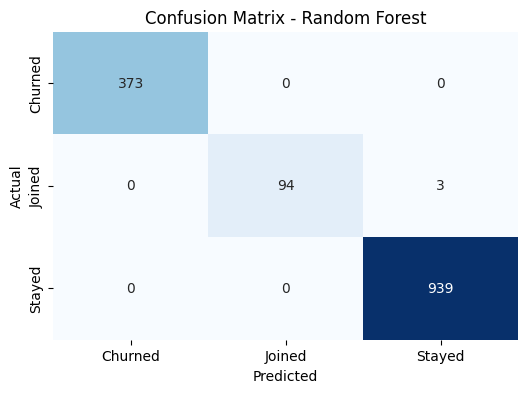

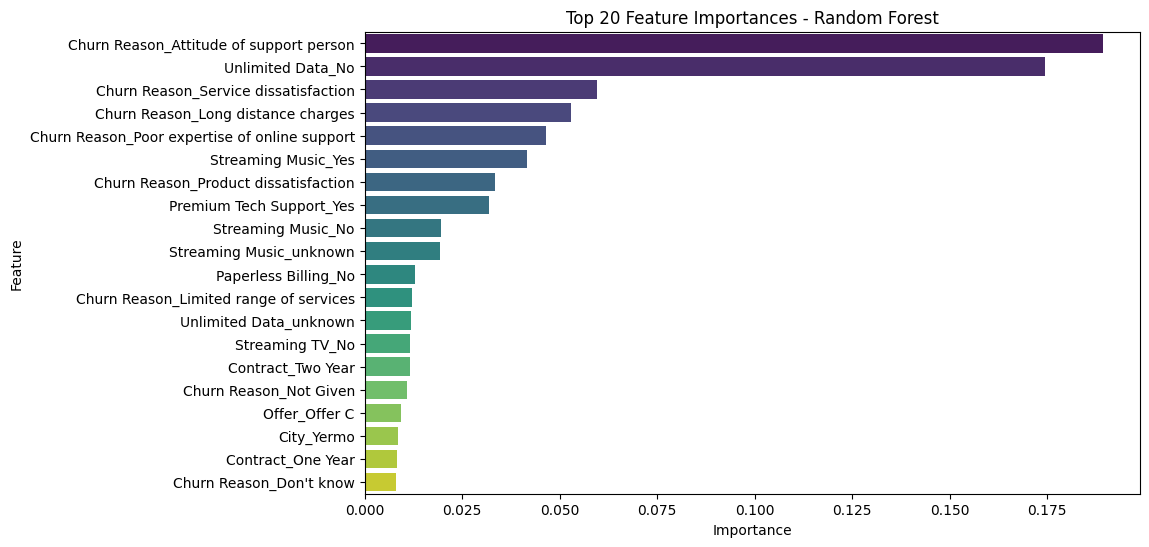


------------------------------------------------------------

KNN:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.48      0.54       373
           1       0.12      0.03      0.05        97
           2       0.77      0.89      0.82       939

    accuracy                           0.72      1409
   macro avg       0.50      0.47      0.47      1409
weighted avg       0.68      0.72      0.69      1409

Confusion Matrix:
[[180   9 184]
 [ 27   3  67]
 [ 91  14 834]]
Test Set Accuracy: 72.18%
Cross-Validation Accuracy: 71.16%
Standard Deviation: 1.59%


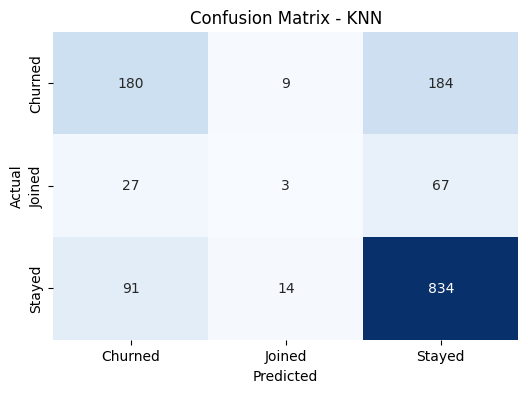


------------------------------------------------------------

Gradient Boost:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       939

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[373   0   0]
 [  0  97   0]
 [  0   0 939]]
Test Set Accuracy: 100.00%
Cross-Validation Accuracy: 100.00%
Standard Deviation: 0.00%


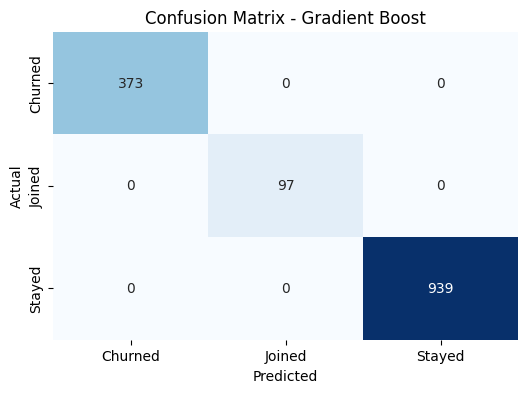

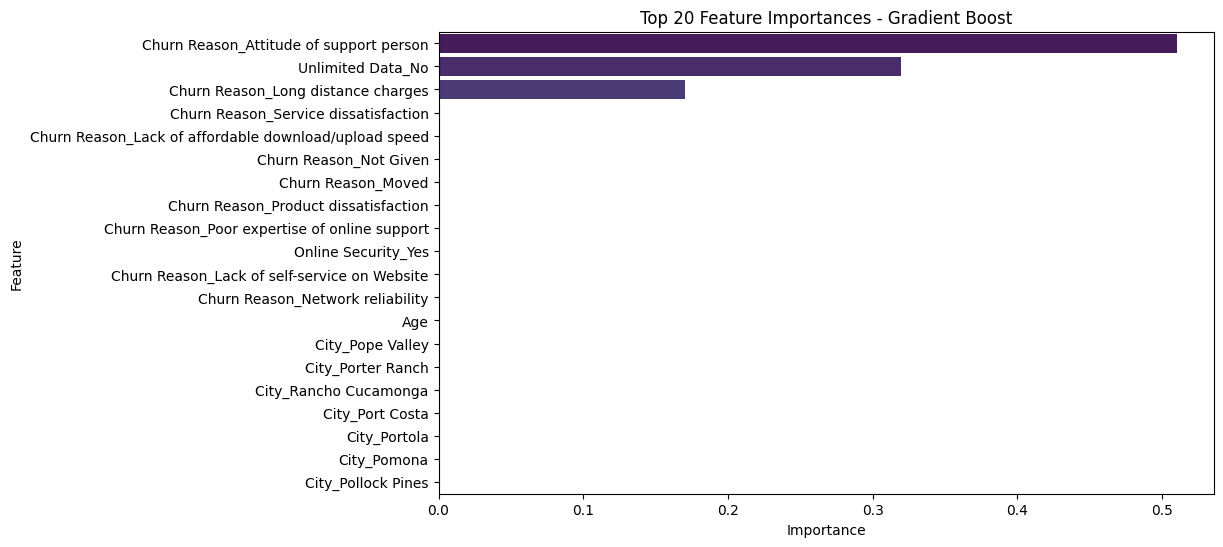


------------------------------------------------------------

Extra Trees:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       0.94      0.60      0.73        97
           2       0.96      1.00      0.98       939

    accuracy                           0.97      1409
   macro avg       0.97      0.86      0.90      1409
weighted avg       0.97      0.97      0.97      1409

Confusion Matrix:
[[373   0   0]
 [  0  58  39]
 [  0   4 935]]
Test Set Accuracy: 96.95%
Cross-Validation Accuracy: 97.60%
Standard Deviation: 0.81%


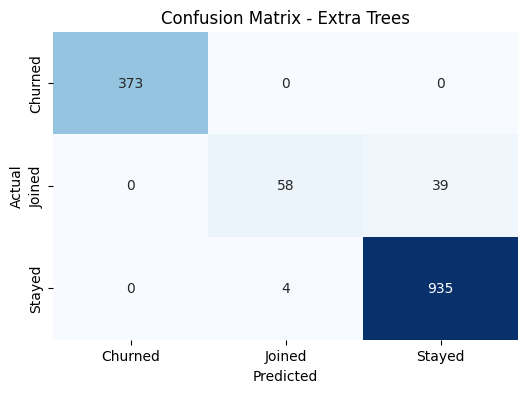

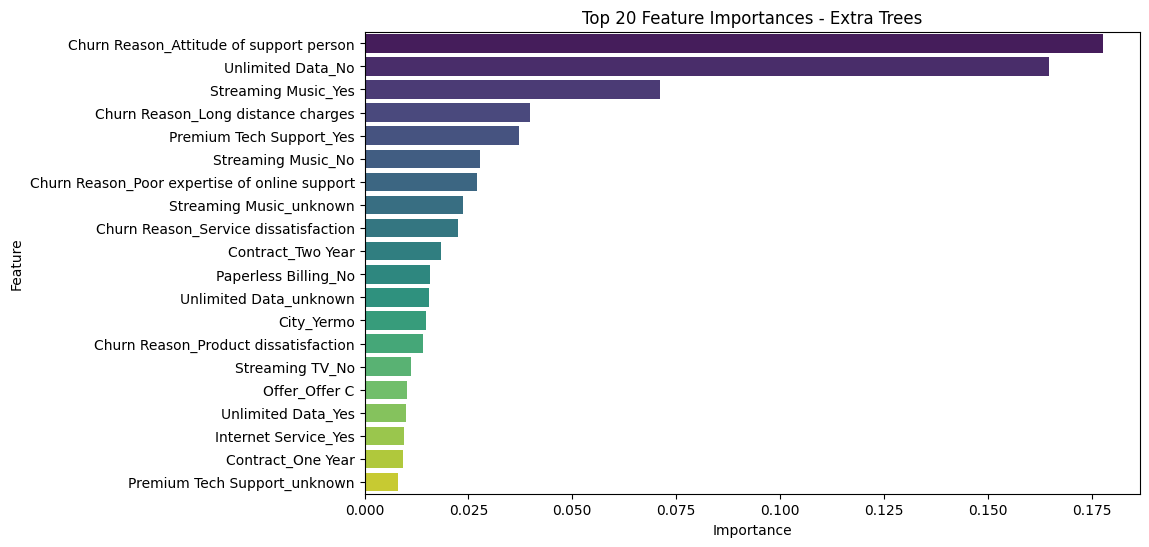


------------------------------------------------------------

Decision Tree:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       939

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[373   0   0]
 [  0  97   0]
 [  0   0 939]]
Test Set Accuracy: 100.00%
Cross-Validation Accuracy: 100.00%
Standard Deviation: 0.00%


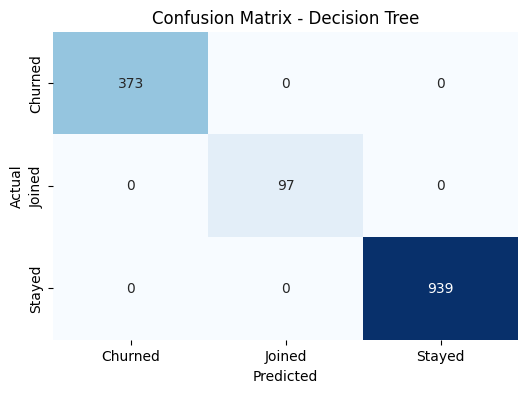

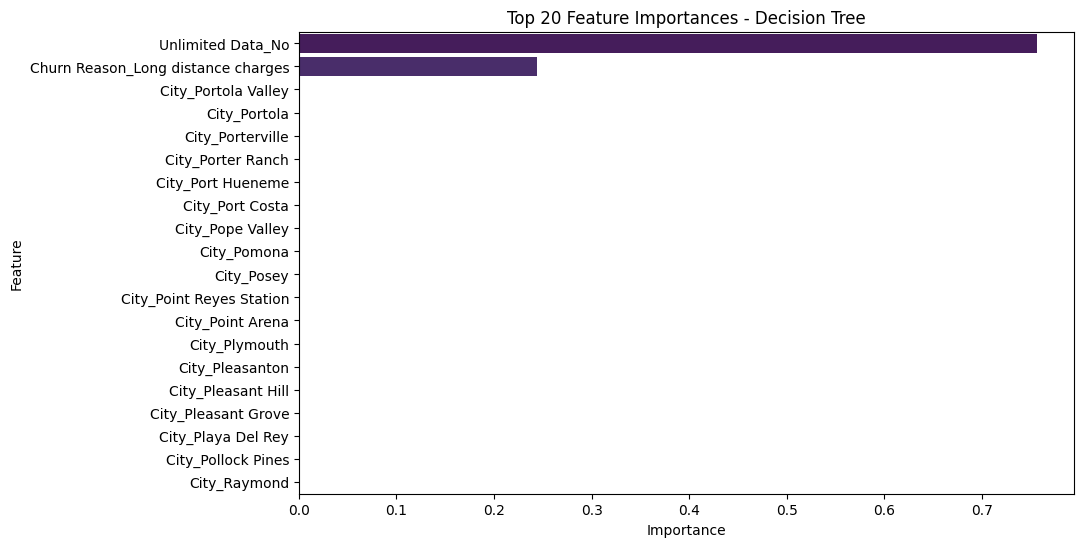


------------------------------------------------------------

Adaboost:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       939

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[373   0   0]
 [  0  97   0]
 [  0   0 939]]
Test Set Accuracy: 100.00%
Cross-Validation Accuracy: 100.00%
Standard Deviation: 0.00%


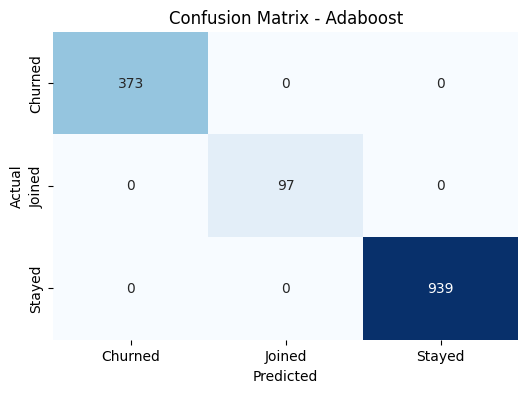

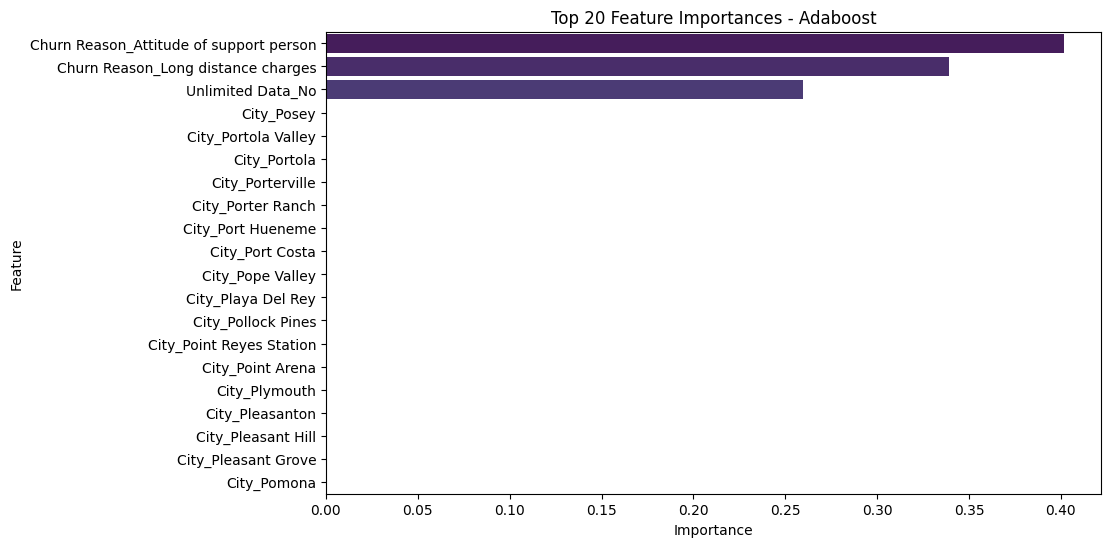


------------------------------------------------------------

XGboost:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       939

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[373   0   0]
 [  0  97   0]
 [  0   0 939]]
Test Set Accuracy: 100.00%
Cross-Validation Accuracy: 100.00%
Standard Deviation: 0.00%


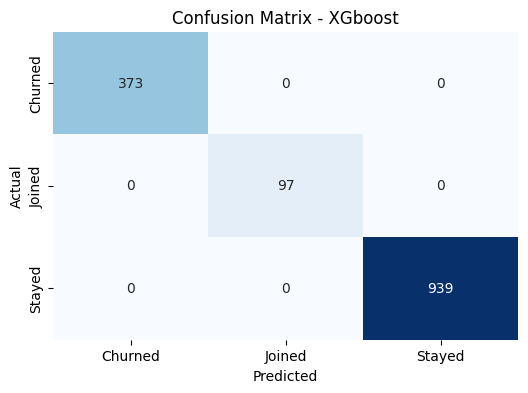

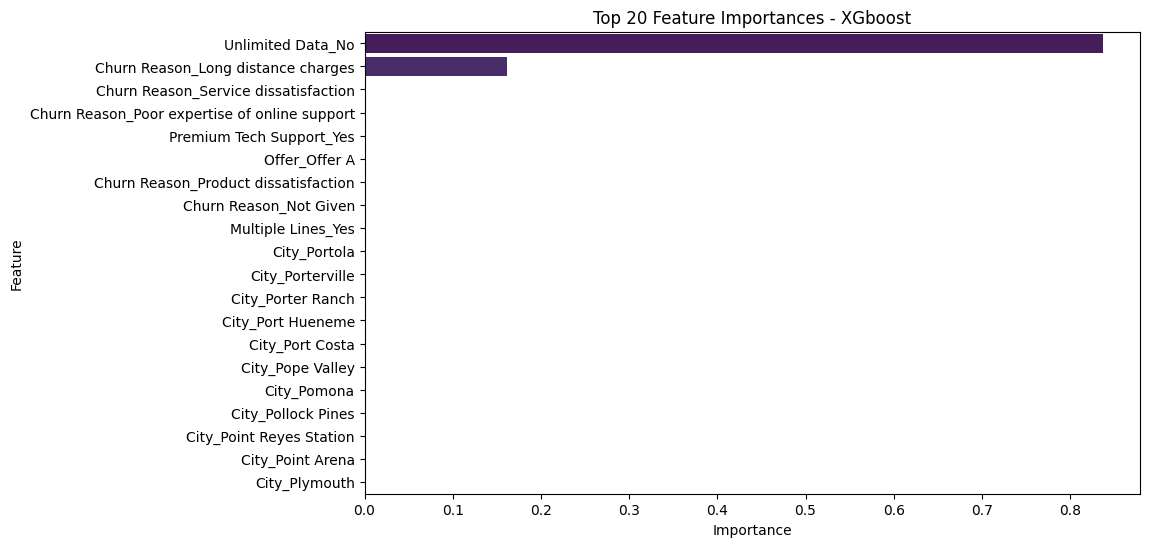


------------------------------------------------------------

LightBGB:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       939

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[373   0   0]
 [  0  97   0]
 [  0   0 939]]
Test Set Accuracy: 100.00%
Cross-Validation Accuracy: 100.00%
Standard Deviation: 0.00%


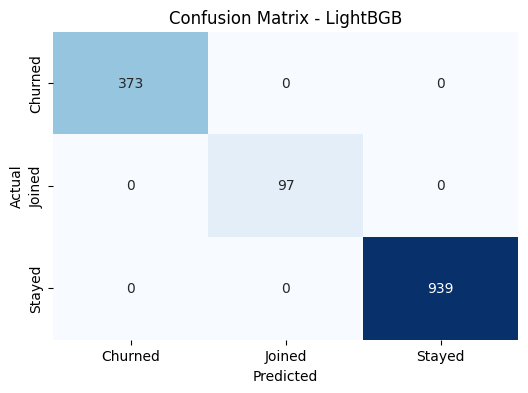

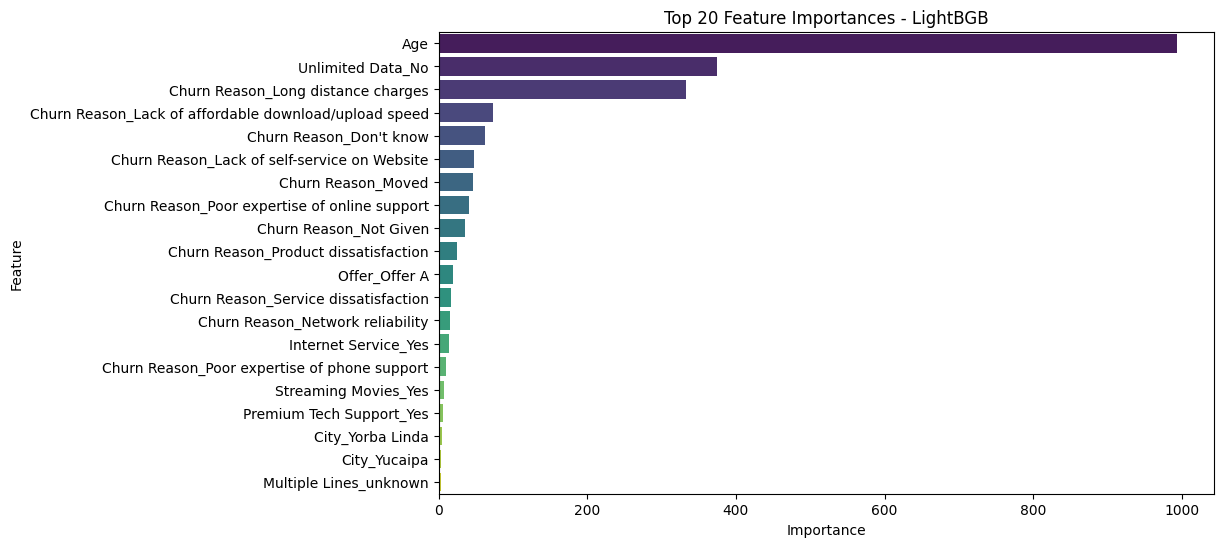


------------------------------------------------------------



In [70]:
# --------------------------------------------
# 🤖 Model Training, Evaluation, and Feature Importance
# --------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize temporary variables to track best models
temp_crossval_accuracy = 0
temp_accuracy = 0

# Get class names from the LabelEncoder for plotting
class_names = label_encoder.classes_

# Combine numerical and categorical features for modeling
X_full = pd.concat([X_numerical_scaled, X_categorical_encoded], axis=1)

# Dictionary of models
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "XGboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightBGB": LGBMClassifier(verbose=-1)
}

# Loop through each model
for name, model in models.items():

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Confusion matrix and accuracy
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

    # Update best models
    if accuracies.mean() >= temp_crossval_accuracy:
        temp_crossval_accuracy = accuracies.mean()
        crossval_model_name = name
    if ac >= temp_accuracy:
        temp_accuracy = ac
        model_name = name

    # Print evaluation metrics
    print(f'{name}:')
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)
    print(f'Test Set Accuracy: {ac*100:.2f}%')
    print(f'Cross-Validation Accuracy: {accuracies.mean()*100:.2f}%')
    print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

    # Confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # -------------------------
    # Feature Importance (for tree-based models only)
    # -------------------------
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.Series(model.feature_importances_, index=X_full.columns)
        feature_importances = feature_importances.sort_values(ascending=False)[:20]  # top 20 features

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
        plt.title(f'Top 20 Feature Importances - {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

    print("\n" + "-"*60 + "\n")